In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gurobipy import Model, GRB, quicksum
from collections import defaultdict
import Solver_V3
import utilities as util

# Data Reading

In [ ]:
df = pd.read_csv("fixed_data.csv", encoding="latin1")
df = df[df["ID"] > 60] #This is because the first few rows were faulty.

In [ ]:
#df.rename(columns={'Ethical technology assessment?':'Ethical technology assessment'}, inplace=True)

bach = df[df['program'] == 'bachelor'] #select the bachelor tuples in a df
mast = df[df['program'] == 'master'] #select the master tuples in a df

b_aal = bach[bach['campus'] == 'AAL'] #select the bachelor aal tuples in a df
m_aal = mast[mast['campus'] == 'AAL'] #select the master aal tuples in a df

b_cph = bach[bach['campus'] == 'CPH'] #select the bachelor cph tuples in a df
m_cph = mast[mast['campus'] == 'CPH'] #select the master cph tuples in a df

esb = df[df['campus'] == 'ESB'] #select the esb tuples in a df

In [ ]:
col1 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most4' 
col2 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most5'
col3 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most6'

courses_b_aal = sorted(set(b_aal[col1]) | set(b_aal[col2]) | set(b_aal[col3])) #Workshops available for bachelor aal, based on the top 3 selected
courses_m_aal = sorted(set(m_aal[col1]) | set(m_aal[col2]) | set(m_aal[col3])) #Workshops available for master aal, based on the top 3 selected

courses_b_cph = sorted(set(b_cph[col1]) | set(b_cph[col2]) | set(b_cph[col3])) #Workshops available for bachelor cph, based on the top 3 selected
courses_m_cph = sorted(set(m_cph[col1]) | set(m_cph[col2]) | set(m_cph[col3])) #Workshops available for master cph, based on the top 3 selected

courses_esb = sorted(set(esb[col1]) | set(esb[col2]) | set(esb[col3])) #Workshops available for esb, based on the top 3 selected


#Select columns from the course names, where each column has NaN, 1, 2, 3 indicating top 3 preference or not
pref_b_aal = b_aal[courses_b_aal] 
pref_m_aal = m_aal[courses_m_aal] 

pref_b_cph = b_cph[courses_b_cph]
pref_m_cph = m_cph[courses_m_cph]

pref_esb = esb[courses_esb]

### Preference Charts

In [5]:
from collections import defaultdict

In [ ]:
diccionary_pref_b_aal = defaultdict(int)
for i, row in pref_b_aal.iterrows():
    for j in range(len(row)):
        if row[j] == 1.0:
            diccionary_pref_b_aal[j+1] += 1

diccionary_pref_m_aal = defaultdict(int)
for i, row in pref_m_aal.iterrows():
    for j in range(len(row)):
        if row[j] == 1.0:
            diccionary_pref_m_aal[j+1] += 1

diccionary_pref_b_cph = defaultdict(int)
for i, row in pref_b_cph.iterrows():
    for j in range(len(row)):
        if row[j] == 1.0:
            diccionary_pref_b_cph[j+1] += 1

diccionary_pref_m_cph = defaultdict(int)
for i, row in pref_m_cph.iterrows():
    for j in range(len(row)):
        if row[j] == 1.0:
            diccionary_pref_m_cph[j+1] += 1

diccionary_pref_esb = defaultdict(int)
for i, row in pref_esb.iterrows():
    for j in range(len(row)):
        if row[j] == 1.0:
            diccionary_pref_esb[j+1] += 1

C:\Users\monts\AppData\Local\Temp\ipykernel_6688\22062498.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[j] == 1.0:
C:\Users\monts\AppData\Local\Temp\ipykernel_6688\22062498.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[j] == 1.0:
C:\Users\monts\AppData\Local\Temp\ipykernel_6688\22062498.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[j] == 1.0:
C:\Users\monts\AppData\Local\Temp\ipykernel_6688\2

In [ ]:
print(diccionary_pref_esb)

defaultdict(<class 'int'>, {10: 2, 6: 2, 14: 2, 13: 3, 8: 2, 17: 6, 7: 2, 3: 2, 11: 4, 1: 2, 5: 1, 4: 2, 12: 1, 9: 2})


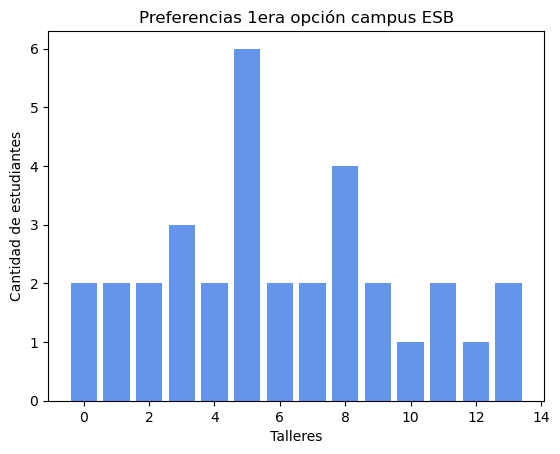

In [ ]:
talleres = list(diccionary_pref_esb.keys())
estudiantes = list(diccionary_pref_esb.values())
plt.bar(range(len(talleres)), estudiantes, color='cornflowerblue') #cornflowerblue royalblue
plt.xlabel('Workshops')
plt.ylabel('Number of students')
plt.title('First-choice preferences campus ESB')
plt.show()

In [ ]:
for i in range(len(courses_esb)):
    print(i, courses_esb[i])

0 Clarification of individual professional competences
1 Collaboration across discplines
2 Creativity and entrepeneurship
3 Digital and hybrid practices in collaborative work
4 Digital practices in project work
5 Ethical technology assessment
6 Facilitation of productive meeting
7 Generative AI in study practices?
8 Interdisciplinary problem design
9 Leadership and project management
10 Motivation, well-being and work-life balance?
11 Professional communication with external partners
12 Professional identity development
13 Psychological safety in team work
14 Psychological safety in teamwork
15 SCRUM-techniques in project work?
16 Systems thinking in engineering


In [5]:
pref_m_aal.head()

,Clarification of individual professional competences,Creative and systems thinking for complex problem-solving (whole day workshop - you are then attending 1 workshop the whole day),Digital and hybrid practices in collaborative work,Ethical technology assessment,Leadership and project management,Professional communication with external partners,Professional identity development,Psychological safety in team work
13,1.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN
15,NaN,1.0,3.0,NaN,NaN,2.0,NaN,NaN
20,1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN
21,1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN
24,3.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN


In [6]:
pref_esb.head()

,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
11,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN
16,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0


Set students’ preferences

In [ ]:
#ejemplo:
util.get_dict(pref_m_aal, 1)                     # To obtain the preference of student 
                                                 # s for option i, use t_pref[s][i]

{1: 1, 2: 5, 3: 2}

# Implementation

## AAL magister

In [ ]:
# Select program and campus
pref = pref_m_aal

# Set parameters
(S, T, H, C, U, t_pref, D, p) = util.get_par(pref)

D[1] = 1                                # Workshop 1 is a full-day workshop.
C = [6, 6]                              # capacity of workshops by time slot (AM, PM)
U = [70 for _ in range(pref.shape[1])]  # capacity of each workshop (all with 80 seats)

print("There are", len(pref), "students; take this into account when choosing capacity and number of workshops")

pref.head()

Hay 393 estudiantes, considerar esto al elegir capacidad y número de talleres


,Clarification of individual professional competences,Creative and systems thinking for complex problem-solving (whole day workshop - you are then attending 1 workshop the whole day),Digital and hybrid practices in collaborative work,Ethical technology assessment,Leadership and project management,Professional communication with external partners,Professional identity development,Psychological safety in team work
13,1.0,3.0,NaN,NaN,NaN,NaN,2.0,NaN
15,NaN,1.0,3.0,NaN,NaN,2.0,NaN,NaN
20,1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN
21,1.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN
24,3.0,NaN,2.0,NaN,1.0,NaN,NaN,NaN


In [ ]:
p = [8, 4, 2] #In case I want to modify the default weights [10, 5, 3]
print(f'Using weights: {p}')

Usando pesos: [8, 4, 2]


In [ ]:
%%time
# 0 at the end so it doesn’t talk so much, 1 if I want more information.
model, y, z, w = Solver_V3.solver(S, T, H, C, U, t_pref, D, p, 1) 

Set parameter TimeLimit to value 1800
Set parameter OutputFlag to value 1
Set parameter Seed to value 69420
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  1800
Seed  69420

Optimize a model with 10252 rows, 6336 columns and 37824 nonzeros
Model fingerprint: 0x16148125
Model has 786 quadratic constraints
Variable types: 0 continuous, 6336 integer (6336 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [2e+00, 8e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 788 rows and 4 columns
Presolve time: 0.12s
Presolved: 21254 rows, 17336 columns, 80262 nonzeros
Variable types: 0 continuous, 17336 integer (1733

## Results AAl magister

In [ ]:
#constraints and variables
print(f"{model.NumConstrs} are linear constraints")
print(f"{model.NumQConstrs} are quadratic constraints")
print(f"{model.NumGenConstrs}are general constraints")
print(f"{model.NumVars} are variables")

10252 son restricciones lineales
786 son restricciones cuadraticas
0 son restricciones generales
6336 variables


In [ ]:
# Average score per student
model.ObjVal / (len(S) - 1)

10.739795918367347

In [ ]:
#Workshops: held or not
util.view_workshops(z)

El taller 0 fue elegido para realizarse
El taller 1 no se realizará
El taller 2 fue elegido para realizarse
El taller 3 no se realizará
El taller 4 fue elegido para realizarse
El taller 5 no se realizará
El taller 6 fue elegido para realizarse
El taller 7 fue elegido para realizarse
El taller 8 fue elegido para realizarse
El taller 9 fue elegido para realizarse
El taller 10 no se realizará
El taller 11 fue elegido para realizarse
El taller 12 fue elegido para realizarse
El taller 13 fue elegido para realizarse
El taller 14 fue elegido para realizarse
El taller 15 no se realizará


In [ ]:
#To see which instance of the workshop is actually held, since workshops may be offered more than once.
util.view_workshops_mod(z, len(T))

El taller 0.0 fue elegido para realizarse
El taller 1.0 no se realizará
El taller 2.0 fue elegido para realizarse
El taller 3.0 no se realizará
El taller 4.0 fue elegido para realizarse
El taller 5.0 no se realizará
El taller 6.0 fue elegido para realizarse
El taller 7.0 fue elegido para realizarse
El taller 0.1 fue elegido para realizarse
El taller 1.1 fue elegido para realizarse
El taller 2.1 no se realizará
El taller 3.1 fue elegido para realizarse
El taller 4.1 fue elegido para realizarse
El taller 5.1 fue elegido para realizarse
El taller 6.1 fue elegido para realizarse
El taller 7.1 no se realizará


In [ ]:
#schedule of each workshop
talleres_AM, talleres_PM = util.talleres_horarios(y)

El taller 0 se da en el horario PM
El taller 2 se da en el horario PM
El taller 4 se da en el horario AM
El taller 6 se da en el horario PM
El taller 7 se da en el horario PM
El taller 8 se da en el horario AM
El taller 9 se da en el horario AM
El taller 9 se da en el horario PM
El taller 11 se da en el horario AM
El taller 12 se da en el horario PM
El taller 13 se da en el horario AM
El taller 14 se da en el horario AM


In [ ]:
#Talleres y sus bloques horarios
print("Workshops AM")
for i in talleres_AM:
    print("- Workshop " + str(i))

print("Workshops PM")
for i in talleres_PM:
    print("- Workshop " + str(i))

Talleres AM
- Taller 4
- Taller 8
- Taller 9
- Taller 11
- Taller 13
- Taller 14
Talleres PM
- Taller 0
- Taller 2
- Taller 6
- Taller 7
- Taller 9
- Taller 12


In [ ]:
#Workshops and their time blocks, considering the workshop version
print("Workshops AM")
for i in talleres_AM:
    print("- Workshop " + str(i%(len(T))) + "." + str(i//(len(T))))

print("Workshops PM")
for i in talleres_PM:
    print("- Workshop " + str(i%(len(T))) + "." + str(i//(len(T))))

Talleres AM
- Taller 4.0
- Taller 0.1
- Taller 1.1
- Taller 3.1
- Taller 5.1
- Taller 6.1
Talleres PM
- Taller 0.0
- Taller 2.0
- Taller 6.0
- Taller 7.0
- Taller 1.1
- Taller 4.1


In [ ]:
#Student assignments to workshops
dic_assignments_made = util.ver_asignaciones(w)

El estudiante 0 fue asignado al taller 0
El estudiante 0 fue asignado al taller 14
El estudiante 1 fue asignado al taller 9
El estudiante 2 fue asignado al taller 6
El estudiante 2 fue asignado al taller 8
El estudiante 3 fue asignado al taller 6
El estudiante 3 fue asignado al taller 8
El estudiante 4 fue asignado al taller 2
El estudiante 4 fue asignado al taller 4
El estudiante 5 fue asignado al taller 2
El estudiante 5 fue asignado al taller 13
El estudiante 6 fue asignado al taller 9
El estudiante 7 fue asignado al taller 9
El estudiante 8 fue asignado al taller 0
El estudiante 8 fue asignado al taller 13
El estudiante 9 fue asignado al taller 7
El estudiante 9 fue asignado al taller 11
El estudiante 10 fue asignado al taller 7
El estudiante 10 fue asignado al taller 11
El estudiante 11 fue asignado al taller 9
El estudiante 12 fue asignado al taller 7
El estudiante 12 fue asignado al taller 11
El estudiante 13 fue asignado al taller 9
El estudiante 14 fue asignado al taller 11
El

In [ ]:
#this dictionary is important because it indicates which version of the workshop the student was assigned to (v1 or v2, and from that we can determine the schedule)
print(dic_assignments_made) #key: student, value:[assigned workshops]

{0: [0, 14], 1: [9], 2: [6, 8], 3: [6, 8], 4: [2, 4], 5: [2, 13], 6: [9], 7: [9], 8: [0, 13], 9: [7, 11], 10: [7, 11], 11: [9], 12: [7, 11], 13: [9], 14: [11, 12], 15: [4, 7], 16: [8, 12], 17: [4, 6], 18: [8, 12], 19: [7, 14], 20: [4, 7], 21: [8, 12], 22: [0, 14], 23: [4, 6], 24: [2, 11], 25: [9], 26: [6, 13], 27: [9], 28: [0, 13], 29: [0, 13], 30: [0, 13], 31: [6, 8], 32: [0, 11], 33: [8, 12], 34: [4, 7], 35: [12, 13], 36: [8, 12], 37: [0, 14], 38: [0, 13], 39: [0, 13], 40: [8, 12], 41: [9], 42: [12, 13], 43: [0, 4], 44: [0, 14], 45: [2, 14], 46: [2, 4], 47: [6, 8], 48: [6, 8], 49: [7, 14], 50: [6, 8], 51: [6, 8], 52: [6, 13], 53: [6, 8], 54: [7, 11], 55: [6, 13], 56: [6, 8], 57: [4, 7], 58: [9], 59: [0, 4], 60: [9], 61: [12, 14], 62: [12, 14], 63: [2, 14], 64: [2, 4], 65: [0, 13], 66: [12, 14], 67: [6, 8], 68: [0, 13], 69: [2, 13], 70: [12, 14], 71: [0, 13], 72: [12, 14], 73: [9], 74: [9], 75: [2, 14], 76: [2, 4], 77: [2, 14], 78: [9], 79: [8, 12], 80: [8, 12], 81: [2, 14], 82: [4, 6

In [ ]:
#create the same dictionary as before, but regardless of which version of the workshop the student was assigned to, only referencing the workshop itself
n_talleres = len(T)
dic_assignments_made_mod = {k: [x%n_talleres for x in v] for k, v in dic_assignments_made.items()}

In [ ]:
#this dictionary treats each workshop independently of which of its possible versions is offered
print(dic_assignments_made_mod)

{0: [0, 6], 1: [1], 2: [6, 0], 3: [6, 0], 4: [2, 4], 5: [2, 5], 6: [1], 7: [1], 8: [0, 5], 9: [7, 3], 10: [7, 3], 11: [1], 12: [7, 3], 13: [1], 14: [3, 4], 15: [4, 7], 16: [0, 4], 17: [4, 6], 18: [0, 4], 19: [7, 6], 20: [4, 7], 21: [0, 4], 22: [0, 6], 23: [4, 6], 24: [2, 3], 25: [1], 26: [6, 5], 27: [1], 28: [0, 5], 29: [0, 5], 30: [0, 5], 31: [6, 0], 32: [0, 3], 33: [0, 4], 34: [4, 7], 35: [4, 5], 36: [0, 4], 37: [0, 6], 38: [0, 5], 39: [0, 5], 40: [0, 4], 41: [1], 42: [4, 5], 43: [0, 4], 44: [0, 6], 45: [2, 6], 46: [2, 4], 47: [6, 0], 48: [6, 0], 49: [7, 6], 50: [6, 0], 51: [6, 0], 52: [6, 5], 53: [6, 0], 54: [7, 3], 55: [6, 5], 56: [6, 0], 57: [4, 7], 58: [1], 59: [0, 4], 60: [1], 61: [4, 6], 62: [4, 6], 63: [2, 6], 64: [2, 4], 65: [0, 5], 66: [4, 6], 67: [6, 0], 68: [0, 5], 69: [2, 5], 70: [4, 6], 71: [0, 5], 72: [4, 6], 73: [1], 74: [1], 75: [2, 6], 76: [2, 4], 77: [2, 6], 78: [1], 79: [0, 4], 80: [0, 4], 81: [2, 6], 82: [4, 6], 83: [1], 84: [6, 5], 85: [6, 3], 86: [4, 6], 87: [4,

In [ ]:
#They should all be equal, meaning that all students were assigned to workshops.
print(len(S), len(dic_assignments_made), len(dic_assignments_made_mod))

393 393 393


## Estadistics AAL magister

### Breakdown by option

In [ ]:
#this one does take double versions into account when counting
counter_first_opt = 0 #it ended up in top 1, and the other one didn’t want it
counter_second_opt = 0 #it ended up in top 2, and the other one didn’t want it
counter_third_opt = 0 #it ended up in top 3, and the other one didn’t want it
counter_first_segunda_opt = 0 #it ended up in top 1 and top2
counter_second_third_opt = 0 #it ended up in top 2 and top 3
counter_first_third_opt = 0 #it ended up in top 1 and top 3
counter_ninguna = 0 #not assigned to any of their preferred workshops
counter_first_opt_whole_day = 0 #it ended up in top 1 and it was a one-day workshop
counter_second_opt_whole_day = 0 #it ended up in top 2 and it was a one-day workshop
counter_third_opt_whole_day = 0 #it ended up in top 3 and it was a one-day workshop

for s in range(len(S)):
    if (t_pref[s][1] in dic_assignments_made_mod[s]) and (t_pref[s][2] in dic_assignments_made_mod[s]):
        counter_first_second_opt += 1 #it ended up in top 1 and top2
    elif (t_pref[s][2] in dic_assignments_made_mod[s]) and (t_pref[s][3] in dic_assignments_made_mod[s]):
        counter_second_third_opt += 1 #it ended up in top 2 and top 3
    elif (t_pref[s][1] in dic_assignments_made_mod[s]) and (t_pref[s][3] in dic_assignments_made_mod[s]):
        counter_first_third_opt += 1 #it ended up in top 1 and top 3
    elif (t_pref[s][1] in dic_assignments_made_mod[s]) and (t_pref[s][2] not in dic_assignments_made_mod[s]) and (t_pref[s][3] not in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) != 1):
        counter_first_opt += 1 #it ended up in top 1, and the other one didn’t want it
    elif (t_pref[s][1] not in dic_assignments_made_mod[s]) and (t_pref[s][2] in dic_assignments_made_mod[s]) and (t_pref[s][3] not in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) != 1):
        counter_second_opt += 1 #it ended up in top 2, and the other one didn’t want it
    elif (t_pref[s][1] not in dic_assignments_made_mod[s]) and (t_pref[s][2] not in dic_assignments_made_mod[s]) and (t_pref[s][3] in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) != 1):
        counter_third_opt += 1 #it ended up in top 3, and the other one didn’t want it
    elif (t_pref[s][1] in dic_assignments_made_mod[s]) and (t_pref[s][2] not in dic_assignments_made_mod[s]) and (t_pref[s][3] not in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) == 1):
        counter_first_opt_whole_day += 1 #it ended up in top 1 and it was a one-day workshop
    elif (t_pref[s][1] not in dic_assignments_made_mod[s]) and (t_pref[s][2] in dic_assignments_made_mod[s]) and (t_pref[s][3] not in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) == 1):
        counter_second_opt_whole_day += 1 #it ended up in top 2 and it was a one-day workshop
    elif (t_pref[s][1] not in dic_assignments_made_mod[s]) and (t_pref[s][2] not in dic_assignments_made_mod[s]) and (t_pref[s][3] in dic_assignments_made_mod[s]) and (len(dic_assignments_made_mod[s]) == 1):
        counter_third_opt_whole_day += 1 #it ended up in top 3 and it was a one-day workshop
    else:
        counter_ninguna += 1 #not assigned to any of their preferred workshops
        print(dic_assignments_made_mod[s])
        print(t_pref[s])

n_students = len(t_pref)

print(f"There are {counter_first_opt} only in their first choice, {100*counter_first_opt/n_students}%")
print(f"There are {counter_second_opt} only in their second choice, {100*counter_second_opt/n_students}%")
print(f"There are {counter_third_opt} only in their third choice, {100*counter_third_opt/n_students}%")
print(f"There are {counter_first_segunda_opt} in their first and second choices, {100*counter_first_second_opt/n_students}%")
print(f"There are {counter_second_third_opt} in their second and third choices, {100*counter_second_third_opt/n_students}%")
print(f"There are {counter_first_third_opt} in their first and third choices, {100*counter_first_third_opt/n_students}%")
print(f"There are {counter_ninguna} in none of the options they chose :(, {100*counter_ninguna/n_students}%")
print(f"There are {counter_first_opt_whole_day} only in their first choice, but this was a full-day workshop, {100*counter_first_opt_whole_day/n_students}%")
print(f"There are {counter_second_opt_whole_day} only in their second choice, but this was a full-day workshop, {100*counter_second_opt_whole_day/n_students}%")
print(f"There are {counter_third_opt_whole_day} only in their third choice, but this was a full-day workshop, {100*counter_third_opt_whole_day/n_students}%")

print(
    "In total there are:",
    counter_first_opt
    + counter_second_opt
    + counter_third_opt
    + counter_first_second_opt
    + counter_second_third_opt
    + counter_first_third_opt
    + counter_ninguna
    + counter_first_opt_whole_day
    + counter_second_opt_whole_day
    + counter_third_opt_whole_day,
    "students",
)

Hay 12 solo en su primera opción, un 3.053435114503817%
Hay 2 solo en su segunda opción, un 0.5089058524173028%
Hay 0 solo en su tercera opción, un 0.0%
Hay 252 en su primera y segunda opción, un 64.12213740458016%
Hay 12 en su segunda y tercera opción, un 3.053435114503817%
Hay 45 en su primera y tercera opción, un 11.450381679389313%
Hay 0 en nada que eligió :(, un 0.0%
Hay 70 solo en su primera opcion, pero esta era de día completo, un 17.8117048346056%
Hay 0 solo en su segunda opción, pero esta era de día completo, un 0.0%
Hay 0 solo en su tercera opción, pero esta era de día completo, un 0.0%
En total hay: 393 estudiantes


### Number of students in first choice and number of students in second choice

In [ ]:
contador_primera = 0
contador_segunda = 0
contador_tercera = 0
for s in range(len(S)):
    if (t_pref[s][1] in dic_assignments_made_mod[s]):
        contador_primera += 1 #quedó en top 1
    if (t_pref[s][2] in dic_assignments_made_mod[s]):
        contador_segunda += 1 #quedó en top2
    if (t_pref[s][3] in dic_assignments_made_mod[s]):
        contador_tercera += 1 #quedó en top2
print("En 1era opcion", contador_primera)
print("En 2nda opcion", contador_segunda)
print("En 3era opcion", contador_tercera)

En 1era opcion 379
En 2nda opcion 266
En 3era opcion 57


### Counting lucky and unlucky people

In [ ]:
#contar cuantos quedaron solo en lo que pidieron, es decir todos los talleres a los que fueron asignados, estaban en su lista
contador_suertudo = 0
contador_no = 0
contador = 0

for s in range(len(S)):
    asignados = dic_assignments_made_mod[s]  
    prefs_vals = set(t_pref[s].values())     

    #todos los asignados están entre los valores preferidos
    if all(a in prefs_vals for a in asignados):
        contador_suertudo += 1
    else:
        contador_no += 1
        print(s, asignados, t_pref[s])
    contador += 1
print("\n")
print("Total suertudos:", contador_suertudo, contador_suertudo/n_alumnos)
print(f"Hay {contador_no} estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el {contador_no/n_alumnos} de 1")

111 [4, 7] {1: 4, 2: 1, 3: 5}
137 [7, 3] {1: 7, 2: 1, 3: 0}
140 [2, 0] {1: 0, 2: 1, 3: 4}
156 [2, 3] {1: 1, 2: 3, 3: 0}
169 [2, 4] {1: 4, 2: 1, 3: 5}
200 [7, 5] {1: 5, 2: 1, 3: 0}
213 [7, 3] {1: 3, 2: 1, 3: 0}
228 [2, 3] {1: 1, 2: 2, 3: 0}
233 [2, 4] {1: 4, 2: 1, 3: 0}
254 [2, 5] {1: 5, 2: 1, 3: 4}
255 [2, 5] {1: 5, 2: 1, 3: 4}
261 [2, 3] {1: 3, 2: 1, 3: 5}
282 [2, 4] {1: 4, 2: 1, 3: 5}
335 [2, 0] {1: 0, 2: 1, 3: 4}


Total suertudos: 379 0.9643765903307888
Hay 14 estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el 0.035623409669211195 de 1


El taller 0 tiene 70 alumnos, está un 100.0% lleno
El taller 1 tiene 70 alumnos, está un 100.0% lleno
El taller 2 tiene 60 alumnos, está un 85.71428571428571% lleno
El taller 4 tiene 70 alumnos, está un 100.0% lleno
El taller 5 tiene 70 alumnos, está un 100.0% lleno
El taller 6 tiene 69 alumnos, está un 98.57142857142858% lleno
El taller 8 tiene 70 alumnos, está un 100.0% lleno
El taller 11 tiene 47 alumnos, está un 67.14285714285714% lleno
El taller 12 tiene 70 alumnos, está un 100.0% lleno
El taller 14 tiene 66 alumnos, está un 94.28571428571428% lleno
El taller 15 tiene 54 alumnos, está un 77.14285714285715% lleno


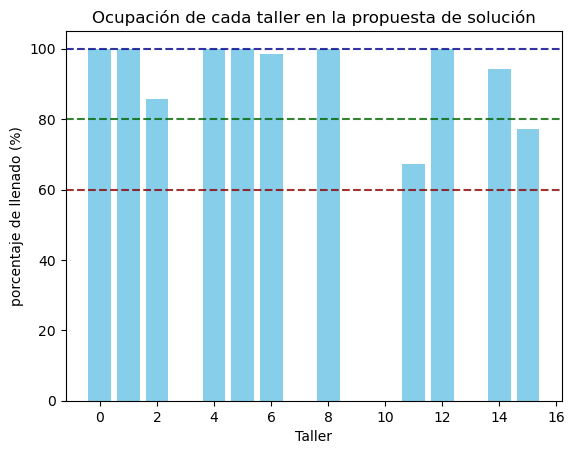

In [ ]:
#contar cuanto se llenó cada taller
talleres = []
porcentajes = []
U_2 = U + U
capacidad_real_taller = defaultdict(int) #la key es el id del taller 0, 1,... y el value es la cantidad de alumnos asignados a este taller en la solución
for key, value in dic_assignments_made.items():
    for taller in value:
       capacidad_real_taller[taller] += 1 

for taller, cantidad in sorted(capacidad_real_taller.items()):
    porcentaje = 100 * cantidad / U_2[taller]
    talleres.append(taller)
    porcentajes.append(porcentaje)
    print(f"El taller {taller} tiene {cantidad} alumnos, está un {100*(cantidad/U_2[taller])}% lleno")

plt.bar(talleres, porcentajes, color='skyblue')
plt.ylabel('porcentaje de llenado (%)')
plt.xlabel('Taller')
plt.title('Ocupación de cada taller en la propuesta de solución')
plt.axhline(100, color='darkblue', linestyle='--', linewidth=1.5, label='100%', alpha=0.8)
plt.axhline(80, color='darkgreen', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)
plt.axhline(60, color='darkred', linestyle='--', linewidth=1.5, label='60%', alpha=0.8)

## AAL bachelor

In [168]:
# Elegir Programa y campus
pref = pref_b_aal

# Setear Parámetros
(S, T, H, C, U, t_pref, D, p) = util.get_par(pref)

#en este caso no hay taller de 1 día
C = [4, 5]                              # capacidad de talleres por horario (AM, PM)
U = [60 for _ in range(pref.shape[1])]  # capacidad de cada taller

print("Hay", len(pref), "estudiantes, considerar esto al elegir capacidad y número de talleres")
print("\n")
pref.head()

Hay 231 estudiantes, considerar esto al elegir capacidad y número de talleres




,Digitale praksisser i projektarbejdet,Etisk teknologivurdering,Facilitering af produktive møder,Generativ AI i studiepraksis,"Motivation, trivsel og work-life balance",Psykologisk tryghed i teams,SCRUM-teknikker i projektarbejdet,Samarbejde på tværs af fagligheder,Systemtænkning i ingeniørvidenskab,Tværfagligt problemdesign
17,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN
18,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN
35,NaN,NaN,NaN,3.0,2.0,NaN,NaN,NaN,1.0,NaN
36,3.0,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN
47,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,2.0,NaN


In [169]:
print(f'Usando pesos: {p}')

Usando pesos: [10, 5, 3]


In [170]:
%%time
# 0 al final para que no hable tanto, 1 si quiero más infor
#modelo, y, z, w = solver(S, T, H, C, U, t_pref, D, p, 0)
modelo_b_AAL, y, z, w = Solver_V3.solver(S, T, H, C, U, t_pref, D, p, 1) 

Set parameter TimeLimit to value 1800
Set parameter OutputFlag to value 1
Set parameter Seed to value 69420
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  1800
Seed  69420

Optimize a model with 7434 rows, 4680 columns and 27840 nonzeros
Model fingerprint: 0x70a872cf
Model has 462 quadratic constraints
Variable types: 0 continuous, 4680 integer (4680 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 231 rows and 0 columns
Presolve time: 0.10s
Presolved: 16905 rows, 13920 columns, 60180 nonzeros
Variable types: 0 continuous, 13920 integer (13920

## Results AAL bachelor

In [51]:
#restricciones y variables
print(f"{modelo_b_AAL.NumConstrs} son restricciones lineales")
print(f"{modelo_b_AAL.NumQConstrs} son restricciones cuadraticas")
print(f"{modelo_b_AAL.NumGenConstrs} son restricciones generales")
print(f"{modelo_b_AAL.NumVars} variables")

7434 son restricciones lineales
462 son restricciones cuadraticas
0 son restricciones generales
4680 variables


In [171]:
# En promedio, puntaje por alumno
modelo_b_AAL.ObjVal / (len(S) - 1)

13.639130434782608

In [ ]:
#Talleres: se realizan o no
util.view_workshops(z)

El taller 0 no se realizará
El taller 1 no se realizará
El taller 2 fue elegido para realizarse
El taller 3 fue elegido para realizarse
El taller 4 fue elegido para realizarse
El taller 5 no se realizará
El taller 6 no se realizará
El taller 7 fue elegido para realizarse
El taller 8 fue elegido para realizarse
El taller 9 fue elegido para realizarse
El taller 10 no se realizará
El taller 11 fue elegido para realizarse
El taller 12 no se realizará
El taller 13 no se realizará
El taller 14 no se realizará
El taller 15 fue elegido para realizarse
El taller 16 no se realizará
El taller 17 no se realizará
El taller 18 fue elegido para realizarse
El taller 19 no se realizará


In [ ]:
#Para ver la versión del taller que se realiza, ya que los talleres se pueden dar más de una vez
util.view_workshops_mod(z, len(T))

El taller 0.0 no se realizará
El taller 1.0 no se realizará
El taller 2.0 fue elegido para realizarse
El taller 3.0 fue elegido para realizarse
El taller 4.0 fue elegido para realizarse
El taller 5.0 no se realizará
El taller 6.0 no se realizará
El taller 7.0 fue elegido para realizarse
El taller 8.0 fue elegido para realizarse
El taller 9.0 fue elegido para realizarse
El taller 0.1 no se realizará
El taller 1.1 fue elegido para realizarse
El taller 2.1 no se realizará
El taller 3.1 no se realizará
El taller 4.1 no se realizará
El taller 5.1 fue elegido para realizarse
El taller 6.1 no se realizará
El taller 7.1 no se realizará
El taller 8.1 fue elegido para realizarse
El taller 9.1 no se realizará


In [55]:
#horario de cada taller
talleres_AM, talleres_PM = util.talleres_horarios(y)

El taller 2 se da en el horario PM
El taller 3 se da en el horario PM
El taller 4 se da en el horario AM
El taller 7 se da en el horario AM
El taller 8 se da en el horario PM
El taller 9 se da en el horario PM
El taller 11 se da en el horario AM
El taller 15 se da en el horario PM
El taller 18 se da en el horario AM


In [56]:
#Talleres y sus bloques horarios
print("Talleres AM")
for i in talleres_AM:
    print("- Taller " + str(i))

print("Talleres PM")
for i in talleres_PM:
    print("- Taller " + str(i))

Talleres AM
- Taller 4
- Taller 7
- Taller 11
- Taller 18
Talleres PM
- Taller 2
- Taller 3
- Taller 8
- Taller 9
- Taller 15


In [57]:
#Talleres y sus bloques horarios, considerando la versión del taller
print("Talleres AM")
for i in talleres_AM:
    print("- Taller " + str(i%(len(T))) + "." + str(i//(len(T))))

print("Talleres PM")
for i in talleres_PM:
    print("- Taller " + str(i%(len(T))) + "." + str(i//(len(T))))

Talleres AM
- Taller 4.0
- Taller 7.0
- Taller 1.1
- Taller 8.1
Talleres PM
- Taller 2.0
- Taller 3.0
- Taller 8.0
- Taller 9.0
- Taller 5.1


In [91]:
#Asignaciones de estudiantes a los talleres
dic_asignaciones_realizadas = util.ver_asignaciones(w)

El estudiante 0 fue asignado al taller 13
El estudiante 0 fue asignado al taller 18
El estudiante 1 fue asignado al taller 13
El estudiante 1 fue asignado al taller 18
El estudiante 2 fue asignado al taller 8
El estudiante 2 fue asignado al taller 14
El estudiante 3 fue asignado al taller 2
El estudiante 3 fue asignado al taller 14
El estudiante 4 fue asignado al taller 8
El estudiante 4 fue asignado al taller 14
El estudiante 5 fue asignado al taller 8
El estudiante 5 fue asignado al taller 14
El estudiante 6 fue asignado al taller 8
El estudiante 6 fue asignado al taller 14
El estudiante 7 fue asignado al taller 8
El estudiante 7 fue asignado al taller 19
El estudiante 8 fue asignado al taller 13
El estudiante 8 fue asignado al taller 19
El estudiante 9 fue asignado al taller 8
El estudiante 9 fue asignado al taller 19
El estudiante 10 fue asignado al taller 8
El estudiante 10 fue asignado al taller 19
El estudiante 11 fue asignado al taller 8
El estudiante 11 fue asignado al taller 

In [92]:
#este diccionario es importante pues indica a la versión del taller al que fue asignado (v1 o v2, y con esto se ve el horario)
print(dic_asignaciones_realizadas) #key: estudiante, value:[talleres asignados]

{0: [13, 18], 1: [13, 18], 2: [8, 14], 3: [2, 14], 4: [8, 14], 5: [8, 14], 6: [8, 14], 7: [8, 19], 8: [13, 19], 9: [8, 19], 10: [8, 19], 11: [8, 19], 12: [8, 19], 13: [13, 18], 14: [8, 19], 15: [2, 19], 16: [13, 15], 17: [13, 15], 18: [17, 19], 19: [2, 18], 20: [17, 18], 21: [13, 14], 22: [8, 19], 23: [17, 19], 24: [17, 18], 25: [2, 15], 26: [8, 19], 27: [2, 14], 28: [8, 19], 29: [6, 13], 30: [6, 13], 31: [17, 18], 32: [15, 17], 33: [13, 18], 34: [13, 18], 35: [13, 15], 36: [17, 18], 37: [2, 14], 38: [8, 19], 39: [8, 14], 40: [15, 17], 41: [8, 19], 42: [8, 14], 43: [2, 18], 44: [13, 18], 45: [2, 6], 46: [8, 14], 47: [17, 18], 48: [6, 13], 49: [6, 8], 50: [6, 8], 51: [2, 6], 52: [13, 14], 53: [13, 14], 54: [13, 18], 55: [13, 14], 56: [13, 18], 57: [8, 19], 58: [8, 19], 59: [8, 19], 60: [13, 18], 61: [13, 18], 62: [13, 18], 63: [13, 18], 64: [2, 18], 65: [17, 18], 66: [14, 17], 67: [2, 6], 68: [8, 19], 69: [13, 15], 70: [8, 19], 71: [8, 14], 72: [8, 14], 73: [8, 14], 74: [13, 14], 75: [8

In [93]:
#crea el mismo diccionario de antes, pero sin importar a la versión a la que fue asignado el estudiante, solo al taller
n_talleres = len(T)
dic_asignaciones_realizadas_mod = {k: [x%n_talleres for x in v] for k, v in dic_asignaciones_realizadas.items()}

In [94]:
#Todos deben ser iguales, es decir, todos los estudiantes fueron asignados a talleres
print(len(S), len(dic_asignaciones_realizadas), len(dic_asignaciones_realizadas_mod))

231 231 231


## Estadistics AAL bachelor

In [95]:
#este sí considera dobles versiones para contabilizar
contador_primera_opt = 0 #quedó en top 1 y la otra no quería
contador_segunda_opt = 0 #quedó en top 2 y la otra no quería
contador_tercera_opt = 0 #quedó en top 3 y la otra no quería
contador_primera_segunda_opt = 0 #quedó en top 1 y top2
contador_segunda_tercera_opt = 0 #quedó en top 2 y top 3
contador_primera_tercera_opt = 0 #quedó en top 1 y top 3
contador_ninguna = 0 #no quedó en ninguna que quería
contador_primera_opt_whole_day = 0 #quedó en top 1 y era taller de solo un día
contador_segunda_opt_whole_day = 0 #quedó en top 2 y era taller de solo un día
contador_tercera_opt_whole_day = 0 #quedó en top 3 y era taller de solo un día

for s in range(len(S)):
    if (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]):
        contador_primera_segunda_opt += 1 #quedó en top 1 y top2
    elif (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]):
        contador_segunda_tercera_opt += 1 #quedó en top 2 y top 3
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]):
        contador_primera_tercera_opt += 1 #quedó en top 1 y top 3
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_primera_opt += 1 #quedó en top 1 y la otra no quería
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_segunda_opt += 1 #quedó en top 2 y la otra no quería
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_tercera_opt += 1 #quedó en top 3 y la otra no quería
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_primera_opt_whole_day += 1 #quedó en top 1 y era todo el dia
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_segunda_opt_whole_day += 1 #quedó en top 2 y era todo el dia
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_tercera_opt_whole_day += 1 #quedó en top 3 y era todo el dia
    else:
        contador_ninguna += 1 #no quedó en ninguna que quería
        print(dic_asignaciones_realizadas_mod[s])
        print(t_pref[s])

n_alumnos = len(t_pref)

print(f"Hay {contador_primera_opt} solo en su primera opción, un {100*contador_primera_opt/n_alumnos}%")
print(f"Hay {contador_segunda_opt} solo en su segunda opción, un {100*contador_segunda_opt/n_alumnos}%")
print(f"Hay {contador_tercera_opt} solo en su tercera opción, un {100*contador_tercera_opt/n_alumnos}%")
print(f"Hay {contador_primera_segunda_opt} en su primera y segunda opción, un {100*contador_primera_segunda_opt/n_alumnos}%")
print(f"Hay {contador_segunda_tercera_opt} en su segunda y tercera opción, un {100*contador_segunda_tercera_opt/n_alumnos}%")
print(f"Hay {contador_primera_tercera_opt} en su primera y tercera opción, un {100*contador_primera_tercera_opt/n_alumnos}%")
print(f"Hay {contador_ninguna} en nada que eligió :(, un {100*contador_ninguna/n_alumnos}%")
print(f"Hay {contador_primera_opt_whole_day} solo en su primera opcion, pero esta era de día completo, un {100*contador_primera_opt_whole_day/n_alumnos}%")
print(f"Hay {contador_segunda_opt_whole_day} solo en su segunda opción, pero esta era de día completo, un {100*contador_segunda_opt_whole_day/n_alumnos}%")
print(f"Hay {contador_tercera_opt_whole_day} solo en su tercera opción, pero esta era de día completo, un {100*contador_tercera_opt_whole_day/n_alumnos}%")

print("En total hay:", contador_primera_opt + contador_segunda_opt + contador_tercera_opt + contador_primera_segunda_opt + contador_segunda_tercera_opt + contador_primera_tercera_opt + contador_ninguna + contador_primera_opt_whole_day + contador_segunda_opt_whole_day + contador_tercera_opt_whole_day, "estudiantes")

Hay 12 solo en su primera opción, un 5.194805194805195%
Hay 2 solo en su segunda opción, un 0.8658008658008658%
Hay 1 solo en su tercera opción, un 0.4329004329004329%
Hay 156 en su primera y segunda opción, un 67.53246753246754%
Hay 13 en su segunda y tercera opción, un 5.627705627705628%
Hay 47 en su primera y tercera opción, un 20.346320346320347%
Hay 0 en nada que eligió :(, un 0.0%
Hay 0 solo en su primera opcion, pero esta era de día completo, un 0.0%
Hay 0 solo en su segunda opción, pero esta era de día completo, un 0.0%
Hay 0 solo en su tercera opción, pero esta era de día completo, un 0.0%
En total hay: 231 estudiantes


In [96]:
contador_primera = 0
contador_segunda = 0
for s in range(len(S)):
    if (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]):
        contador_primera += 1 #quedó en top 1
    if (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]):
        contador_segunda += 1 #quedó en top2
print("En 1era opcion", contador_primera)
print("En 2nda opcion", contador_segunda)

En 1era opcion 215
En 2nda opcion 171


In [97]:
#contar cuantos quedaron solo en lo que pidieron, es decir todos los talleres a los que fueron asignados, estaban en su lista
contador_suertudo = 0
contador_no = 0
contador = 0

for s in range(len(S)):
    asignados = dic_asignaciones_realizadas_mod[s]  
    prefs_vals = set(t_pref[s].values())     

    #todos los asignados están entre los valores preferidos
    if all(a in prefs_vals for a in asignados):
        contador_suertudo += 1
    else:
        contador_no += 1
        print(s, prefs_vals, asignados)
    contador += 1
print("\n")
print("Total suertudos:", contador_suertudo, contador_suertudo/n_alumnos)
print(f"Hay {contador_no} estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el {contador_no/n_alumnos} de 1")

3 {0, 4, 6} [2, 4]
15 {0, 2, 3} [2, 9]
37 {9, 4, 6} [2, 4]
68 {0, 1, 8} [8, 9]
106 {1, 4, 5} [2, 5]
107 {1, 4, 5} [2, 5]
108 {1, 4, 5} [2, 5]
109 {0, 5, 6} [2, 5]
121 {0, 9, 6} [6, 7]
142 {9, 4, 6} [2, 4]
145 {8, 1, 0} [8, 9]
164 {1, 4, 5} [5, 7]
198 {1, 5, 9} [2, 5]
222 {0, 1, 4} [2, 4]
230 {0, 1, 9} [2, 9]


Total suertudos: 216 0.935064935064935
Hay 15 estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el 0.06493506493506493 de 1


El taller 2 tiene 45 alumnos, está un 64.28571428571429% lleno
El taller 6 tiene 24 alumnos, está un 34.285714285714285% lleno
El taller 8 tiene 66 alumnos, está un 94.28571428571428% lleno
El taller 13 tiene 70 alumnos, está un 100.0% lleno
El taller 14 tiene 69 alumnos, está un 98.57142857142858% lleno
El taller 15 tiene 23 alumnos, está un 32.857142857142854% lleno
El taller 17 tiene 50 alumnos, está un 71.42857142857143% lleno
El taller 18 tiene 61 alumnos, está un 87.14285714285714% lleno
El taller 19 tiene 54 alumnos, está un 77.14285714285715% lleno


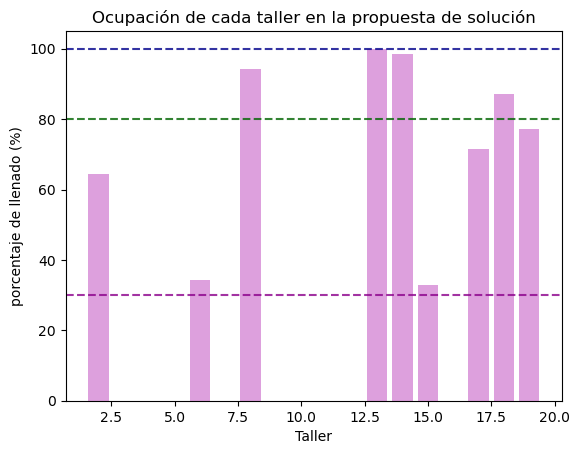

In [100]:
#contar cuanto se llenó cada taller
talleres = []
porcentajes = []
U_2 = U + U
capacidad_real_taller = defaultdict(int) #la key es el id del taller 0, 1,... y el value es la cantidad de alumnos asignados a este taller en la solución
for key, value in dic_asignaciones_realizadas.items():
    for taller in value:
       capacidad_real_taller[taller] += 1 

for taller, cantidad in sorted(capacidad_real_taller.items()):
    porcentaje = 100 * cantidad / U_2[taller]
    talleres.append(taller)
    porcentajes.append(porcentaje)
    print(f"El taller {taller} tiene {cantidad} alumnos, está un {100*(cantidad/U_2[taller])}% lleno")

plt.bar(talleres, porcentajes, color='plum')
plt.ylabel('porcentaje de llenado (%)')
plt.xlabel('Taller')
plt.title('Ocupación de cada taller en la propuesta de solución')
plt.axhline(100, color='darkblue', linestyle='--', linewidth=1.5, label='100%', alpha=0.8)
plt.axhline(80, color='darkgreen', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)
plt.axhline(30, color='darkmagenta', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)

## CPH master

In [5]:
# Elegir Programa y campus
pref = pref_m_cph

# Setear Parámetros
(S, T, H, C, U, t_pref, D, p) = util.get_par(pref)

D[1] = 1                                # el taller 1 es de día completo
C = [3, 3]                              # capacidad de talleres por horario (AM, PM)
U = [40 for _ in range(pref.shape[1])]  # capacidad de cada taller (todos con x cupos)

print("Hay", len(pref), "estudiantes, considerar esto al elegir capacidad y número de talleres")

pref.head()

Hay 60 estudiantes, considerar esto al elegir capacidad y número de talleres


,Clarification of individual professional competences,Creative and systems thinking for complex problem-solving (whole day workshop - you are then attending 1 workshop the whole day),Digital and hybrid practices in collaborative work,Ethical technology assessment,Leadership and project management,Professional communication with external partners,Professional identity development,Psychological safety in team work
45,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1.0
55,1.0,NaN,NaN,NaN,3.0,NaN,2.0,NaN
63,NaN,2.0,3.0,1.0,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,2.0,NaN,3.0,1.0,NaN
65,NaN,2.0,NaN,NaN,1.0,3.0,NaN,NaN


In [6]:
#p = [8, 4, 2] #por si quiero modificar los pesos estándar [10, 5, 3]
print(f'Usando pesos: {p}')

Usando pesos: [10, 5, 3]


In [7]:
%%time
# 0 al final para que no hable tanto, 1 si quiero más infor
#modelo, y, z, w = solver(S, T, H, C, U, t_pref, D, p, 0)
modelo_m_CPH, y, z, w = Solver_V3.solver(S, T, H, C, U, t_pref, D, p, 1) 

Set parameter Username
Academic license - for non-commercial use only - expires 2026-10-16
Set parameter TimeLimit to value 1800
Set parameter OutputFlag to value 1
Set parameter Seed to value 69420
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  1800
Seed  69420

Optimize a model with 1594 rows, 1008 columns and 5856 nonzeros
Model fingerprint: 0x39fc368c
Model has 120 quadratic constraints
Variable types: 0 continuous, 1008 integer (1008 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 122 rows and 4 columns
Presolve time: 0.05s
Presolved: 32

## Results CPH master

In [8]:
#restricciones y variables
print(f"{modelo_m_CPH.NumConstrs} son restricciones lineales")
print(f"{modelo_m_CPH.NumQConstrs} son restricciones cuadraticas")
print(f"{modelo_m_CPH.NumGenConstrs} son restricciones generales")
print(f"{modelo_m_CPH.NumVars} variables")

1594 son restricciones lineales
120 son restricciones cuadraticas
0 son restricciones generales
1008 variables


In [9]:
# En promedio, puntaje por alumno
modelo_m_CPH.ObjVal / (len(S) - 1)

12.305084745762711

In [ ]:
#Talleres: se realizan o no
util.view_workshops(z)

El taller 0 fue elegido para realizarse
El taller 1 no se realizará
El taller 2 no se realizará
El taller 3 no se realizará
El taller 4 no se realizará
El taller 5 fue elegido para realizarse
El taller 6 fue elegido para realizarse
El taller 7 no se realizará
El taller 8 no se realizará
El taller 9 no se realizará
El taller 10 no se realizará
El taller 11 fue elegido para realizarse
El taller 12 fue elegido para realizarse
El taller 13 no se realizará
El taller 14 no se realizará
El taller 15 fue elegido para realizarse


In [ ]:
#Para ver la versión del taller que se realiza, ya que los talleres se pueden dar más de una vez
util.view_workshops_mod(z, len(T))

El taller 0.0 fue elegido para realizarse
El taller 1.0 no se realizará
El taller 2.0 no se realizará
El taller 3.0 no se realizará
El taller 4.0 no se realizará
El taller 5.0 fue elegido para realizarse
El taller 6.0 fue elegido para realizarse
El taller 7.0 no se realizará
El taller 0.1 no se realizará
El taller 1.1 no se realizará
El taller 2.1 no se realizará
El taller 3.1 fue elegido para realizarse
El taller 4.1 fue elegido para realizarse
El taller 5.1 no se realizará
El taller 6.1 no se realizará
El taller 7.1 fue elegido para realizarse


In [12]:
#horario de cada taller
talleres_AM, talleres_PM = util.talleres_horarios(y)

El taller 0 se da en el horario PM
El taller 5 se da en el horario AM
El taller 6 se da en el horario AM
El taller 11 se da en el horario AM
El taller 12 se da en el horario PM
El taller 15 se da en el horario PM


In [13]:
#Talleres y sus bloques horarios
print("Talleres AM")
for i in talleres_AM:
    print("- Taller " + str(i))

print("Talleres PM")
for i in talleres_PM:
    print("- Taller " + str(i))

Talleres AM
- Taller 5
- Taller 6
- Taller 11
Talleres PM
- Taller 0
- Taller 12
- Taller 15


In [14]:
#Talleres y sus bloques horarios, considerando la versión del taller
print("Talleres AM")
for i in talleres_AM:
    print("- Taller " + str(i%(len(T))) + "." + str(i//(len(T))))

print("Talleres PM")
for i in talleres_PM:
    print("- Taller " + str(i%(len(T))) + "." + str(i//(len(T))))

Talleres AM
- Taller 5.0
- Taller 6.0
- Taller 3.1
Talleres PM
- Taller 0.0
- Taller 4.1
- Taller 7.1


In [15]:
#Asignaciones de estudiantes a los talleres
dic_asignaciones_realizadas = util.ver_asignaciones(w)

El estudiante 0 fue asignado al taller 6
El estudiante 0 fue asignado al taller 15
El estudiante 1 fue asignado al taller 0
El estudiante 1 fue asignado al taller 6
El estudiante 2 fue asignado al taller 11
El estudiante 2 fue asignado al taller 12
El estudiante 3 fue asignado al taller 0
El estudiante 3 fue asignado al taller 6
El estudiante 4 fue asignado al taller 5
El estudiante 4 fue asignado al taller 12
El estudiante 5 fue asignado al taller 6
El estudiante 5 fue asignado al taller 15
El estudiante 6 fue asignado al taller 11
El estudiante 6 fue asignado al taller 15
El estudiante 7 fue asignado al taller 5
El estudiante 7 fue asignado al taller 15
El estudiante 8 fue asignado al taller 0
El estudiante 8 fue asignado al taller 6
El estudiante 9 fue asignado al taller 5
El estudiante 9 fue asignado al taller 12
El estudiante 10 fue asignado al taller 0
El estudiante 10 fue asignado al taller 11
El estudiante 11 fue asignado al taller 6
El estudiante 11 fue asignado al taller 12
E

In [16]:
#este diccionario es importante pues indica a la versión del taller al que fue asignado (v1 o v2, y con esto se ve el horario)
print(dic_asignaciones_realizadas) #key: estudiante, value:[talleres asignados]

{0: [6, 15], 1: [0, 6], 2: [11, 12], 3: [0, 6], 4: [5, 12], 5: [6, 15], 6: [11, 15], 7: [5, 15], 8: [0, 6], 9: [5, 12], 10: [0, 11], 11: [6, 12], 12: [0, 5], 13: [5, 12], 14: [5, 12], 15: [6, 12], 16: [0, 5], 17: [11, 12], 18: [5, 12], 19: [6, 12], 20: [0, 6], 21: [6, 12], 22: [0, 11], 23: [0, 11], 24: [0, 11], 25: [5, 12], 26: [0, 6], 27: [11, 12], 28: [0, 6], 29: [0, 5], 30: [0, 11], 31: [0, 6], 32: [6, 12], 33: [6, 12], 34: [6, 12], 35: [6, 12], 36: [6, 12], 37: [0, 5], 38: [11, 12], 39: [11, 15], 40: [0, 6], 41: [0, 11], 42: [0, 11], 43: [0, 6], 44: [0, 6], 45: [11, 12], 46: [0, 5], 47: [0, 6], 48: [6, 15], 49: [0, 5], 50: [0, 11], 51: [0, 5], 52: [5, 12], 53: [5, 12], 54: [5, 12], 55: [6, 12], 56: [6, 12], 57: [0, 6], 58: [0, 6], 59: [5, 12]}


In [17]:
#crea el mismo diccionario de antes, pero sin importar a la versión a la que fue asignado el estudiante, solo al taller
n_talleres = len(T)
dic_asignaciones_realizadas_mod = {k: [x%n_talleres for x in v] for k, v in dic_asignaciones_realizadas.items()}

In [18]:
#Todos deben ser iguales, es decir, todos los estudiantes fueron asignados a talleres
print(len(S), len(dic_asignaciones_realizadas), len(dic_asignaciones_realizadas_mod))

60 60 60


## Estadistics CPH master

In [19]:
#este sí considera dobles versiones para contabilizar
contador_primera_opt = 0 #quedó en top 1 y la otra no quería
contador_segunda_opt = 0 #quedó en top 2 y la otra no quería
contador_tercera_opt = 0 #quedó en top 3 y la otra no quería
contador_primera_segunda_opt = 0 #quedó en top 1 y top2
contador_segunda_tercera_opt = 0 #quedó en top 2 y top 3
contador_primera_tercera_opt = 0 #quedó en top 1 y top 3
contador_ninguna = 0 #no quedó en ninguna que quería
contador_primera_opt_whole_day = 0 #quedó en top 1 y era taller de solo un día
contador_segunda_opt_whole_day = 0 #quedó en top 2 y era taller de solo un día
contador_tercera_opt_whole_day = 0 #quedó en top 3 y era taller de solo un día

for s in range(len(S)):
    if (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]):
        contador_primera_segunda_opt += 1 #quedó en top 1 y top2
    elif (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]):
        contador_segunda_tercera_opt += 1 #quedó en top 2 y top 3
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]):
        contador_primera_tercera_opt += 1 #quedó en top 1 y top 3
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_primera_opt += 1 #quedó en top 1 y la otra no quería
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_segunda_opt += 1 #quedó en top 2 y la otra no quería
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_tercera_opt += 1 #quedó en top 3 y la otra no quería
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_primera_opt_whole_day += 1 #quedó en top 1 y era todo el dia
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_segunda_opt_whole_day += 1 #quedó en top 2 y era todo el dia
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_tercera_opt_whole_day += 1 #quedó en top 3 y era todo el dia
    else:
        contador_ninguna += 1 #no quedó en ninguna que quería
        print(dic_asignaciones_realizadas_mod[s])
        print(t_pref[s])

n_alumnos = len(t_pref)

print(f"Hay {contador_primera_opt} solo en su primera opción, un {100*contador_primera_opt/n_alumnos}%")
print(f"Hay {contador_segunda_opt} solo en su segunda opción, un {100*contador_segunda_opt/n_alumnos}%")
print(f"Hay {contador_tercera_opt} solo en su tercera opción, un {100*contador_tercera_opt/n_alumnos}%")
print(f"Hay {contador_primera_segunda_opt} en su primera y segunda opción, un {100*contador_primera_segunda_opt/n_alumnos}%")
print(f"Hay {contador_segunda_tercera_opt} en su segunda y tercera opción, un {100*contador_segunda_tercera_opt/n_alumnos}%")
print(f"Hay {contador_primera_tercera_opt} en su primera y tercera opción, un {100*contador_primera_tercera_opt/n_alumnos}%")
print(f"Hay {contador_ninguna} en nada que eligió :(, un {100*contador_ninguna/n_alumnos}%")
print(f"Hay {contador_primera_opt_whole_day} solo en su primera opcion, pero esta era de día completo, un {100*contador_primera_opt_whole_day/n_alumnos}%")
print(f"Hay {contador_segunda_opt_whole_day} solo en su segunda opción, pero esta era de día completo, un {100*contador_segunda_opt_whole_day/n_alumnos}%")
print(f"Hay {contador_tercera_opt_whole_day} solo en su tercera opción, pero esta era de día completo, un {100*contador_tercera_opt_whole_day/n_alumnos}%")

print("En total hay:", contador_primera_opt + contador_segunda_opt + contador_tercera_opt + contador_primera_segunda_opt + contador_segunda_tercera_opt + contador_primera_tercera_opt + contador_ninguna + contador_primera_opt_whole_day + contador_segunda_opt_whole_day + contador_tercera_opt_whole_day, "estudiantes")

Hay 6 solo en su primera opción, un 10.0%
Hay 6 solo en su segunda opción, un 10.0%
Hay 0 solo en su tercera opción, un 0.0%
Hay 26 en su primera y segunda opción, un 43.333333333333336%
Hay 8 en su segunda y tercera opción, un 13.333333333333334%
Hay 14 en su primera y tercera opción, un 23.333333333333332%
Hay 0 en nada que eligió :(, un 0.0%
Hay 0 solo en su primera opcion, pero esta era de día completo, un 0.0%
Hay 0 solo en su segunda opción, pero esta era de día completo, un 0.0%
Hay 0 solo en su tercera opción, pero esta era de día completo, un 0.0%
En total hay: 60 estudiantes


In [20]:
contador_primera = 0
contador_segunda = 0
first = []
second = []
for s in range(len(S)):
    if (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]):
        contador_primera += 1 #quedó en top 1
        first.append(s)
    if (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]):
        contador_segunda += 1 #quedó en top2
        second.append(s)
print("En 1era opcion", contador_primera,  contador_primera/n_alumnos*100)
print("En 2nda opcion", contador_segunda,  contador_segunda/n_alumnos*100)

En 1era opcion 46 76.66666666666667
En 2nda opcion 40 66.66666666666666


In [124]:
for i in range(60):
    if i not in first:
        print(i)

13
26
29
34
37
39
41
42
45
48
50
52
53
54


In [126]:
for i in range(60):
    if i not in second:
        print(i)

2
3
4
7
8
9
10
11
15
16
17
18
28
30
38
49
51
56
57
59


In [21]:
#contar cuantos quedaron solo en lo que pidieron, es decir todos los talleres a los que fueron asignados, estaban en su lista
contador_suertudo = 0
contador_no = 0
contador = 0

for s in range(len(S)):
    asignados = dic_asignaciones_realizadas_mod[s]  
    prefs_vals = set(t_pref[s].values())     

    #todos los asignados están entre los valores preferidos
    if all(a in prefs_vals for a in asignados):
        contador_suertudo += 1
        #print(s, prefs_vals, asignados)
    else:
        contador_no += 1
        #print(s, prefs_vals, asignados)
    contador += 1
print("\n")
print("Total suertudos:", contador_suertudo, contador_suertudo/n_alumnos)
print(f"Hay {contador_no} estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el {contador_no/n_alumnos} de 1")



Total suertudos: 48 0.8
Hay 12 estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el 0.2 de 1


El taller 0 tiene 28 alumnos, está un 70.0% lleno
El taller 5 tiene 18 alumnos, está un 45.0% lleno
El taller 6 tiene 27 alumnos, está un 67.5% lleno
El taller 11 tiene 15 alumnos, está un 37.5% lleno
El taller 12 tiene 26 alumnos, está un 65.0% lleno
El taller 15 tiene 6 alumnos, está un 15.0% lleno


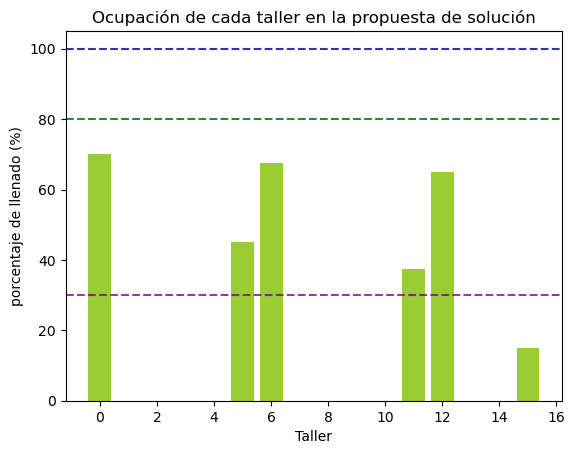

In [22]:
#contar cuanto se llenó cada taller
talleres = []
porcentajes = []
U_2 = U + U
capacidad_real_taller = defaultdict(int) #la key es el id del taller 0, 1,... y el value es la cantidad de alumnos asignados a este taller en la solución
for key, value in dic_asignaciones_realizadas.items():
    for taller in value:
       capacidad_real_taller[taller] += 1 

for taller, cantidad in sorted(capacidad_real_taller.items()):
    porcentaje = 100 * cantidad / U_2[taller]
    talleres.append(taller)
    porcentajes.append(porcentaje)
    print(f"El taller {taller} tiene {cantidad} alumnos, está un {100*(cantidad/U_2[taller])}% lleno")

plt.bar(talleres, porcentajes, color='yellowgreen')
plt.ylabel('porcentaje de llenado (%)')
plt.xlabel('Taller')
plt.title('Ocupación de cada taller en la propuesta de solución')
plt.axhline(100, color='darkblue', linestyle='--', linewidth=1.5, label='100%', alpha=0.8)
plt.axhline(80, color='darkgreen', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)
plt.axhline(30, color='darkmagenta', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)

## CPH bachelor

In [84]:
# Elegir Programa y campus
pref = pref_b_cph

# Setear Parámetros
(S, T, H, C, U, t_pref, D, p) = util.get_par(pref)

#en este caso no hay taller de 1 día
C = [2, 3]                              # capacidad de talleres por horario (AM, PM)
U = [50 for _ in range(pref.shape[1])]  # capacidad de cada taller

print("Hay", len(pref), "estudiantes, considerar esto al elegir capacidad y número de talleres")
print("\n")
pref.head()

Hay 57 estudiantes, considerar esto al elegir capacidad y número de talleres




,Digitale praksisser i projektarbejdet,Etisk teknologivurdering,Facilitering af produktive møder,Generativ AI i studiepraksis,"Motivation, trivsel og work-life balance",Psykologisk tryghed i teams,SCRUM-teknikker i projektarbejdet,Samarbejde på tværs af fagligheder,Systemtænkning i ingeniørvidenskab,Tværfagligt problemdesign
69,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,2.0,NaN
70,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,2.0,NaN
71,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,2.0,NaN
76,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,1.0,3.0
113,NaN,NaN,NaN,NaN,NaN,3.0,1.0,NaN,2.0,NaN


In [85]:
#p = [16, 15, 2]
print(f'Usando pesos: {p}')

Usando pesos: [10, 5, 3]


In [86]:
%%time
# 0 al final para que no hable tanto, 1 si quiero más infor
#modelo, y, z, w = solver(S, T, H, C, U, t_pref, D, p, 0)
modelo_b_CPH, y, z, w = Solver_V3.solver(S, T, H, C, U, t_pref, D, p, 1) 

Set parameter TimeLimit to value 1800
Set parameter OutputFlag to value 1
Set parameter Seed to value 69420
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  1800
Seed  69420

Optimize a model with 1866 rows, 1200 columns and 6960 nonzeros
Model fingerprint: 0x7deda033
Model has 114 quadratic constraints
Variable types: 0 continuous, 1200 integer (1200 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 3e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 57 rows and 0 columns
Presolve time: 0.05s
Presolved: 4203 rows, 3480 columns, 14940 nonzeros
Variable types: 0 continuous, 3480 integer (3480 binar

## Results CPH bachelor

In [87]:
#restricciones y variables
print(f"{modelo_b_CPH.NumConstrs} son restricciones lineales")
print(f"{modelo_b_CPH.NumQConstrs} son restricciones cuadraticas")
print(f"{modelo_b_CPH.NumGenConstrs} son restricciones generales")
print(f"{modelo_b_CPH.NumVars} variables")

1866 son restricciones lineales
114 son restricciones cuadraticas
0 son restricciones generales
1200 variables


In [88]:
# En promedio, puntaje por alumno
modelo_b_CPH.ObjVal / (len(S) - 1)

11.017857142857142

In [ ]:
#Talleres: se realizan o no
util.view_workshops(z)

El taller 0 no se realizará
El taller 1 no se realizará
El taller 2 no se realizará
El taller 3 no se realizará
El taller 4 no se realizará
El taller 5 no se realizará
El taller 6 fue elegido para realizarse
El taller 7 no se realizará
El taller 8 fue elegido para realizarse
El taller 9 no se realizará
El taller 10 no se realizará
El taller 11 no se realizará
El taller 12 fue elegido para realizarse
El taller 13 fue elegido para realizarse
El taller 14 no se realizará
El taller 15 fue elegido para realizarse
El taller 16 no se realizará
El taller 17 no se realizará
El taller 18 no se realizará
El taller 19 no se realizará


In [ ]:
#Para ver la versión del taller que se realiza, ya que los talleres se pueden dar más de una vez
util.view_workshops_mod(z, len(T))

El taller 0.0 no se realizará
El taller 1.0 no se realizará
El taller 2.0 no se realizará
El taller 3.0 no se realizará
El taller 4.0 no se realizará
El taller 5.0 no se realizará
El taller 6.0 fue elegido para realizarse
El taller 7.0 no se realizará
El taller 8.0 fue elegido para realizarse
El taller 9.0 no se realizará
El taller 0.1 no se realizará
El taller 1.1 no se realizará
El taller 2.1 fue elegido para realizarse
El taller 3.1 fue elegido para realizarse
El taller 4.1 no se realizará
El taller 5.1 fue elegido para realizarse
El taller 6.1 no se realizará
El taller 7.1 no se realizará
El taller 8.1 no se realizará
El taller 9.1 no se realizará


In [91]:
#horario de cada taller
talleres_AM, talleres_PM = util.talleres_horarios(y)

El taller 6 se da en el horario PM
El taller 8 se da en el horario AM
El taller 12 se da en el horario AM
El taller 13 se da en el horario PM
El taller 15 se da en el horario PM


In [92]:
#Talleres y sus bloques horarios
print("Talleres AM")
for i in talleres_AM:
    print("- Taller " + str(i))

print("Talleres PM")
for i in talleres_PM:
    print("- Taller " + str(i))
    

Talleres AM
- Taller 8
- Taller 12
Talleres PM
- Taller 6
- Taller 13
- Taller 15


In [93]:
#Talleres y sus bloques horarios, considerando la versión del taller
print("Talleres AM")
for i in talleres_AM:
    print("- Taller " + str(i%(len(T))) + "." + str(i//(len(T))))

print("Talleres PM")
for i in talleres_PM:
    print("- Taller " + str(i%(len(T))) + "." + str(i//(len(T))))

Talleres AM
- Taller 8.0
- Taller 2.1
Talleres PM
- Taller 6.0
- Taller 3.1
- Taller 5.1


In [94]:
#Asignaciones de estudiantes a los talleres
dic_asignaciones_realizadas = util.ver_asignaciones(w)

El estudiante 0 fue asignado al taller 6
El estudiante 0 fue asignado al taller 8
El estudiante 1 fue asignado al taller 6
El estudiante 1 fue asignado al taller 8
El estudiante 2 fue asignado al taller 6
El estudiante 2 fue asignado al taller 8
El estudiante 3 fue asignado al taller 6
El estudiante 3 fue asignado al taller 8
El estudiante 4 fue asignado al taller 6
El estudiante 4 fue asignado al taller 8
El estudiante 5 fue asignado al taller 12
El estudiante 5 fue asignado al taller 13
El estudiante 6 fue asignado al taller 8
El estudiante 6 fue asignado al taller 13
El estudiante 7 fue asignado al taller 12
El estudiante 7 fue asignado al taller 13
El estudiante 8 fue asignado al taller 8
El estudiante 8 fue asignado al taller 13
El estudiante 9 fue asignado al taller 12
El estudiante 9 fue asignado al taller 15
El estudiante 10 fue asignado al taller 6
El estudiante 10 fue asignado al taller 8
El estudiante 11 fue asignado al taller 8
El estudiante 11 fue asignado al taller 13
El 

In [95]:
#crea el mismo diccionario de antes, pero sin importar a la versión a la que fue asignado el estudiante, solo al taller
n_talleres = len(T)
dic_asignaciones_realizadas_mod = {k: [x%n_talleres for x in v] for k, v in dic_asignaciones_realizadas.items()}

In [96]:
#Todos deben ser iguales, es decir, todos los estudiantes fueron asignados a talleres
print(len(S), len(dic_asignaciones_realizadas), len(dic_asignaciones_realizadas_mod))

57 57 57


## Estadistics CPH bachelor

In [97]:
#este sí considera dobles versiones para contabilizar
contador_primera_opt = 0 #quedó en top 1 y la otra no quería
contador_segunda_opt = 0 #quedó en top 2 y la otra no quería
contador_tercera_opt = 0 #quedó en top 3 y la otra no quería
contador_primera_segunda_opt = 0 #quedó en top 1 y top2
contador_segunda_tercera_opt = 0 #quedó en top 2 y top 3
contador_primera_tercera_opt = 0 #quedó en top 1 y top 3
contador_ninguna = 0 #no quedó en ninguna que quería
contador_primera_opt_whole_day = 0 #quedó en top 1 y era taller de solo un día
contador_segunda_opt_whole_day = 0 #quedó en top 2 y era taller de solo un día
contador_tercera_opt_whole_day = 0 #quedó en top 3 y era taller de solo un día

for s in range(len(S)):
    if (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]):
        contador_primera_segunda_opt += 1 #quedó en top 1 y top2
    elif (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]):
        contador_segunda_tercera_opt += 1 #quedó en top 2 y top 3
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]):
        contador_primera_tercera_opt += 1 #quedó en top 1 y top 3
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_primera_opt += 1 #quedó en top 1 y la otra no quería
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_segunda_opt += 1 #quedó en top 2 y la otra no quería
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_tercera_opt += 1 #quedó en top 3 y la otra no quería
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_primera_opt_whole_day += 1 #quedó en top 1 y era todo el dia
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_segunda_opt_whole_day += 1 #quedó en top 2 y era todo el dia
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_tercera_opt_whole_day += 1 #quedó en top 3 y era todo el dia
    else:
        contador_ninguna += 1 #no quedó en ninguna que quería
        print(dic_asignaciones_realizadas_mod[s])
        print(t_pref[s])

n_alumnos = len(t_pref)

print(f"Hay {contador_primera_opt} solo en su primera opción, un {100*contador_primera_opt/n_alumnos}%")
print(f"Hay {contador_segunda_opt} solo en su segunda opción, un {100*contador_segunda_opt/n_alumnos}%")
print(f"Hay {contador_tercera_opt} solo en su tercera opción, un {100*contador_tercera_opt/n_alumnos}%")
print(f"Hay {contador_primera_segunda_opt} en su primera y segunda opción, un {100*contador_primera_segunda_opt/n_alumnos}%")
print(f"Hay {contador_segunda_tercera_opt} en su segunda y tercera opción, un {100*contador_segunda_tercera_opt/n_alumnos}%")
print(f"Hay {contador_primera_tercera_opt} en su primera y tercera opción, un {100*contador_primera_tercera_opt/n_alumnos}%")
print(f"Hay {contador_ninguna} en nada que eligió :(, un {100*contador_ninguna/n_alumnos}%")
print(f"Hay {contador_primera_opt_whole_day} solo en su primera opcion, pero esta era de día completo, un {100*contador_primera_opt_whole_day/n_alumnos}%")
print(f"Hay {contador_segunda_opt_whole_day} solo en su segunda opción, pero esta era de día completo, un {100*contador_segunda_opt_whole_day/n_alumnos}%")
print(f"Hay {contador_tercera_opt_whole_day} solo en su tercera opción, pero esta era de día completo, un {100*contador_tercera_opt_whole_day/n_alumnos}%")

print("En total hay:", contador_primera_opt + contador_segunda_opt + contador_tercera_opt + contador_primera_segunda_opt + contador_segunda_tercera_opt + contador_primera_tercera_opt + contador_ninguna + contador_primera_opt_whole_day + contador_segunda_opt_whole_day + contador_tercera_opt_whole_day, "estudiantes")

Hay 14 solo en su primera opción, un 24.56140350877193%
Hay 8 solo en su segunda opción, un 14.035087719298245%
Hay 4 solo en su tercera opción, un 7.017543859649122%
Hay 16 en su primera y segunda opción, un 28.07017543859649%
Hay 2 en su segunda y tercera opción, un 3.508771929824561%
Hay 13 en su primera y tercera opción, un 22.80701754385965%
Hay 0 en nada que eligió :(, un 0.0%
Hay 0 solo en su primera opcion, pero esta era de día completo, un 0.0%
Hay 0 solo en su segunda opción, pero esta era de día completo, un 0.0%
Hay 0 solo en su tercera opción, pero esta era de día completo, un 0.0%
En total hay: 57 estudiantes


In [99]:
contador_primera = 0
contador_segunda = 0
for s in range(len(S)):
    if (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]):
        contador_primera += 1 #quedó en top 1
    if (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]):
        contador_segunda += 1 #quedó en top2
print("En 1era opcion", contador_primera/n_alumnos)
print("En 2nda opcion", contador_segunda/n_alumnos)

En 1era opcion 0.7543859649122807
En 2nda opcion 0.45614035087719296


In [100]:
#contar cuantos quedaron solo en lo que pidieron, es decir todos los talleres a los que fueron asignados, estaban en su lista
contador_suertudo = 0
contador_no = 0
contador = 0

for s in range(len(S)):
    asignados = dic_asignaciones_realizadas_mod[s]  
    prefs_vals = set(t_pref[s].values())     

    #todos los asignados están entre los valores preferidos
    if all(a in prefs_vals for a in asignados):
        contador_suertudo += 1
    else:
        contador_no += 1
        print(s, prefs_vals, asignados)
    contador += 1
print("\n")
print("Total suertudos:", contador_suertudo, contador_suertudo/n_alumnos)
print(f"Hay {contador_no} estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el {contador_no/n_alumnos} de 1")

3 {8, 9, 2} [6, 8]
5 {0, 3, 4} [2, 3]
7 {8, 9, 2} [2, 3]
9 {0, 4, 5} [2, 5]
10 {8, 9, 7} [6, 8]
11 {8, 9, 7} [8, 3]
13 {0, 3, 5} [2, 5]
14 {0, 4, 5} [2, 5]
17 {8, 1, 2} [6, 8]
20 {8, 4, 7} [8, 3]
24 {9, 5, 7} [8, 5]
25 {9, 5, 7} [8, 5]
26 {9, 5, 7} [8, 5]
29 {1, 2, 4} [6, 2]
30 {1, 2, 7} [2, 5]
31 {9, 3, 4} [8, 3]
32 {8, 2, 4} [6, 8]
33 {9, 3, 7} [2, 3]
36 {1, 2, 9} [2, 5]
37 {8, 1, 2} [6, 8]
42 {8, 9, 0} [8, 5]
43 {8, 1, 2} [6, 2]
44 {8, 1, 2} [6, 2]
47 {8, 9, 7} [6, 8]
49 {0, 3, 6} [8, 3]
54 {0, 9, 5} [2, 5]


Total suertudos: 31 0.543859649122807
Hay 26 estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el 0.45614035087719296 de 1


El taller 6 tiene 25 alumnos, está un 50.0% lleno
El taller 8 tiene 34 alumnos, está un 68.0% lleno
El taller 12 tiene 23 alumnos, está un 46.0% lleno
El taller 13 tiene 18 alumnos, está un 36.0% lleno
El taller 15 tiene 14 alumnos, está un 28.000000000000004% lleno


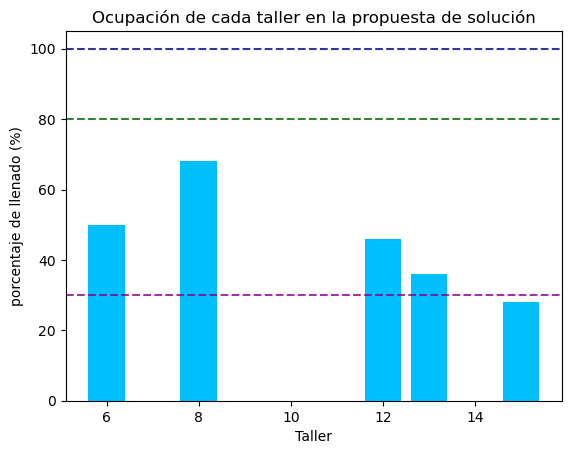

In [186]:
#contar cuanto se llenó cada taller
talleres = []
porcentajes = []
U_2 = U + U
capacidad_real_taller = defaultdict(int) #la key es el id del taller 0, 1,... y el value es la cantidad de alumnos asignados a este taller en la solución
for key, value in dic_asignaciones_realizadas.items():
    for taller in value:
       capacidad_real_taller[taller] += 1 

for taller, cantidad in sorted(capacidad_real_taller.items()):
    porcentaje = 100 * cantidad / U_2[taller]
    talleres.append(taller)
    porcentajes.append(porcentaje)
    print(f"El taller {taller} tiene {cantidad} alumnos, está un {100*(cantidad/U_2[taller])}% lleno")

plt.bar(talleres, porcentajes, color='deepskyblue')
plt.ylabel('porcentaje de llenado (%)')
plt.xlabel('Taller')
plt.title('Ocupación de cada taller en la propuesta de solución')
plt.axhline(100, color='darkblue', linestyle='--', linewidth=1.5, label='100%', alpha=0.8)
plt.axhline(80, color='darkgreen', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)
plt.axhline(30, color='darkmagenta', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)

## ESB

In [215]:
# Elegir Programa y campus
pref = pref_esb

# Setear Parámetros
(S, T, H, C, U, t_pref, D, p) = util.get_par(pref)

#en este caso no hay taller de 1 día
C = [2, 2]                              # capacidad de talleres por horario (AM, PM)
U = [50 for _ in range(pref.shape[1])]  # capacidad de cada taller

print("Hay", len(pref), "estudiantes, considerar esto al elegir capacidad y número de talleres")
print("\n")
pref.head()

Hay 33 estudiantes, considerar esto al elegir capacidad y número de talleres




,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
11,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,1.0,NaN,NaN,NaN
16,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0


In [193]:
print(f'Usando pesos: {p}')

Usando pesos: [10, 5, 3]


In [194]:
%%time
# 0 al final para que no hable tanto, 1 si quiero más infor
#modelo, y, z, w = solver(S, T, H, C, U, t_pref, D, p, 0)
modelo_ESB, y, z, w = Solver_V3.solver(S, T, H, C, U, t_pref, D, p, 1) 

Set parameter TimeLimit to value 1800
Set parameter OutputFlag to value 1
Set parameter Seed to value 69420
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  1800
Seed  69420

Optimize a model with 1819 rows, 1224 columns and 6936 nonzeros
Model fingerprint: 0xccd0e817
Model has 66 quadratic constraints
Variable types: 0 continuous, 1224 integer (1224 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [3e+00, 1e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
  QRHS range       [1e+00, 1e+00]
Presolve removed 67 rows and 0 columns
Presolve time: 0.05s
Presolved: 4062 rows, 3468 columns, 13634 nonzeros
Variable types: 0 continuous, 3468 integer (3468 binary

## Results ESB

In [195]:
#restricciones y variables
print(f"{modelo_ESB.NumConstrs} son restricciones lineales")
print(f"{modelo_ESB.NumQConstrs} son restricciones cuadraticas")
print(f"{modelo_ESB.NumGenConstrs} son restricciones generales")
print(f"{modelo_ESB.NumVars} variables")

1819 son restricciones lineales
66 son restricciones cuadraticas
0 son restricciones generales
1224 variables


In [196]:
# En promedio, puntaje por alumno
modelo_ESB.ObjVal / (len(S) - 1)

7.375

In [ ]:
#Talleres: se realizan o no
util.view_workshops(z)

El taller 0 fue elegido para realizarse
El taller 1 no se realizará
El taller 2 no se realizará
El taller 3 no se realizará
El taller 4 no se realizará
El taller 5 no se realizará
El taller 6 no se realizará
El taller 7 fue elegido para realizarse
El taller 8 no se realizará
El taller 9 fue elegido para realizarse
El taller 10 no se realizará
El taller 11 no se realizará
El taller 12 no se realizará
El taller 13 no se realizará
El taller 14 no se realizará
El taller 15 no se realizará
El taller 16 fue elegido para realizarse
El taller 17 no se realizará
El taller 18 no se realizará
El taller 19 no se realizará
El taller 20 no se realizará
El taller 21 no se realizará
El taller 22 no se realizará
El taller 23 no se realizará
El taller 24 no se realizará
El taller 25 no se realizará
El taller 26 no se realizará
El taller 27 no se realizará
El taller 28 no se realizará
El taller 29 no se realizará
El taller 30 no se realizará
El taller 31 no se realizará
El taller 32 no se realizará
El ta

In [ ]:
#Para ver la versión del taller que se realiza, ya que los talleres se pueden dar más de una vez
util.view_workshops_mod(z, len(T))

El taller 0.0 fue elegido para realizarse
El taller 1.0 no se realizará
El taller 2.0 no se realizará
El taller 3.0 no se realizará
El taller 4.0 no se realizará
El taller 5.0 no se realizará
El taller 6.0 no se realizará
El taller 7.0 fue elegido para realizarse
El taller 8.0 no se realizará
El taller 9.0 fue elegido para realizarse
El taller 10.0 no se realizará
El taller 11.0 no se realizará
El taller 12.0 no se realizará
El taller 13.0 no se realizará
El taller 14.0 no se realizará
El taller 15.0 no se realizará
El taller 16.0 fue elegido para realizarse
El taller 0.1 no se realizará
El taller 1.1 no se realizará
El taller 2.1 no se realizará
El taller 3.1 no se realizará
El taller 4.1 no se realizará
El taller 5.1 no se realizará
El taller 6.1 no se realizará
El taller 7.1 no se realizará
El taller 8.1 no se realizará
El taller 9.1 no se realizará
El taller 10.1 no se realizará
El taller 11.1 no se realizará
El taller 12.1 no se realizará
El taller 13.1 no se realizará
El taller 1

In [199]:
#horario de cada taller
talleres_AM, talleres_PM = util.talleres_horarios(y)

El taller 0 se da en el horario PM
El taller 7 se da en el horario AM
El taller 9 se da en el horario AM
El taller 16 se da en el horario PM


In [109]:
#Talleres y sus bloques horarios
print("Talleres AM")
for i in talleres_AM:
    print("- Taller " + str(i))

print("Talleres PM")
for i in talleres_PM:
    print("- Taller " + str(i))

Talleres AM
- Taller 7
- Taller 9
Talleres PM
- Taller 0
- Taller 16


In [110]:
#Talleres y sus bloques horarios, considerando la versión del taller
print("Talleres AM")
for i in talleres_AM:
    print("- Taller " + str(i%(len(T))) + "." + str(i//(len(T))))

print("Talleres PM")
for i in talleres_PM:
    print("- Taller " + str(i%(len(T))) + "." + str(i//(len(T))))

Talleres AM
- Taller 7.0
- Taller 9.0
Talleres PM
- Taller 0.0
- Taller 16.0


In [111]:
#Asignaciones de estudiantes a los talleres
dic_asignaciones_realizadas = util.ver_asignaciones(w)

El estudiante 0 fue asignado al taller 0
El estudiante 0 fue asignado al taller 9
El estudiante 1 fue asignado al taller 7
El estudiante 1 fue asignado al taller 16
El estudiante 2 fue asignado al taller 0
El estudiante 2 fue asignado al taller 9
El estudiante 3 fue asignado al taller 0
El estudiante 3 fue asignado al taller 9
El estudiante 4 fue asignado al taller 7
El estudiante 4 fue asignado al taller 16
El estudiante 5 fue asignado al taller 7
El estudiante 5 fue asignado al taller 16
El estudiante 6 fue asignado al taller 7
El estudiante 6 fue asignado al taller 16
El estudiante 7 fue asignado al taller 0
El estudiante 7 fue asignado al taller 9
El estudiante 8 fue asignado al taller 0
El estudiante 8 fue asignado al taller 9
El estudiante 9 fue asignado al taller 0
El estudiante 9 fue asignado al taller 7
El estudiante 10 fue asignado al taller 0
El estudiante 10 fue asignado al taller 9
El estudiante 11 fue asignado al taller 0
El estudiante 11 fue asignado al taller 9
El estud

In [112]:
#crea el mismo diccionario de antes, pero sin importar a la versión a la que fue asignado el estudiante, solo al taller
n_talleres = len(T)
dic_asignaciones_realizadas_mod = {k: [x%n_talleres for x in v] for k, v in dic_asignaciones_realizadas.items()}

In [113]:
#Todos deben ser iguales, es decir, todos los estudiantes fueron asignados a talleres
print(len(S), len(dic_asignaciones_realizadas), len(dic_asignaciones_realizadas_mod))

33 33 33


## Estadistics ESB

In [114]:
#este sí considera dobles versiones para contabilizar
contador_primera_opt = 0 #quedó en top 1 y la otra no quería
contador_segunda_opt = 0 #quedó en top 2 y la otra no quería
contador_tercera_opt = 0 #quedó en top 3 y la otra no quería
contador_primera_segunda_opt = 0 #quedó en top 1 y top2
contador_segunda_tercera_opt = 0 #quedó en top 2 y top 3
contador_primera_tercera_opt = 0 #quedó en top 1 y top 3
contador_ninguna = 0 #no quedó en ninguna que quería
contador_primera_opt_whole_day = 0 #quedó en top 1 y era taller de solo un día
contador_segunda_opt_whole_day = 0 #quedó en top 2 y era taller de solo un día
contador_tercera_opt_whole_day = 0 #quedó en top 3 y era taller de solo un día

for s in range(len(S)):
    if (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]):
        contador_primera_segunda_opt += 1 #quedó en top 1 y top2
    elif (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]):
        contador_segunda_tercera_opt += 1 #quedó en top 2 y top 3
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]):
        contador_primera_tercera_opt += 1 #quedó en top 1 y top 3
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_primera_opt += 1 #quedó en top 1 y la otra no quería
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_segunda_opt += 1 #quedó en top 2 y la otra no quería
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) != 1):
        contador_tercera_opt += 1 #quedó en top 3 y la otra no quería
    elif (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_primera_opt_whole_day += 1 #quedó en top 1 y era todo el dia
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] not in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_segunda_opt_whole_day += 1 #quedó en top 2 y era todo el dia
    elif (t_pref[s][1] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][2] not in dic_asignaciones_realizadas_mod[s]) and (t_pref[s][3] in dic_asignaciones_realizadas_mod[s]) and (len(dic_asignaciones_realizadas_mod[s]) == 1):
        contador_tercera_opt_whole_day += 1 #quedó en top 3 y era todo el dia
    else:
        contador_ninguna += 1 #no quedó en ninguna que quería
        print(dic_asignaciones_realizadas_mod[s])
        print(t_pref[s])

n_alumnos = len(t_pref)

print(f"Hay {contador_primera_opt} solo en su primera opción, un {100*contador_primera_opt/n_alumnos}%")
print(f"Hay {contador_segunda_opt} solo en su segunda opción, un {100*contador_segunda_opt/n_alumnos}%")
print(f"Hay {contador_tercera_opt} solo en su tercera opción, un {100*contador_tercera_opt/n_alumnos}%")
print(f"Hay {contador_primera_segunda_opt} en su primera y segunda opción, un {100*contador_primera_segunda_opt/n_alumnos}%")
print(f"Hay {contador_segunda_tercera_opt} en su segunda y tercera opción, un {100*contador_segunda_tercera_opt/n_alumnos}%")
print(f"Hay {contador_primera_tercera_opt} en su primera y tercera opción, un {100*contador_primera_tercera_opt/n_alumnos}%")
print(f"Hay {contador_ninguna} en nada que eligió :(, un {100*contador_ninguna/n_alumnos}%")
print(f"Hay {contador_primera_opt_whole_day} solo en su primera opcion, pero esta era de día completo, un {100*contador_primera_opt_whole_day/n_alumnos}%")
print(f"Hay {contador_segunda_opt_whole_day} solo en su segunda opción, pero esta era de día completo, un {100*contador_segunda_opt_whole_day/n_alumnos}%")
print(f"Hay {contador_tercera_opt_whole_day} solo en su tercera opción, pero esta era de día completo, un {100*contador_tercera_opt_whole_day/n_alumnos}%")

print("En total hay:", contador_primera_opt + contador_segunda_opt + contador_tercera_opt + contador_primera_segunda_opt + contador_segunda_tercera_opt + contador_primera_tercera_opt + contador_ninguna + contador_primera_opt_whole_day + contador_segunda_opt_whole_day + contador_tercera_opt_whole_day, "estudiantes")

[0, 7]
{1: 6, 2: 14, 3: 1}
[0, 7]
{1: 10, 2: 5, 3: 1}
Hay 8 solo en su primera opción, un 24.242424242424242%
Hay 9 solo en su segunda opción, un 27.272727272727273%
Hay 5 solo en su tercera opción, un 15.151515151515152%
Hay 2 en su primera y segunda opción, un 6.0606060606060606%
Hay 5 en su segunda y tercera opción, un 15.151515151515152%
Hay 2 en su primera y tercera opción, un 6.0606060606060606%
Hay 2 en nada que eligió :(, un 6.0606060606060606%
Hay 0 solo en su primera opcion, pero esta era de día completo, un 0.0%
Hay 0 solo en su segunda opción, pero esta era de día completo, un 0.0%
Hay 0 solo en su tercera opción, pero esta era de día completo, un 0.0%
En total hay: 33 estudiantes


In [118]:
contador_primera = 0
contador_segunda = 0
for s in range(len(S)):
    if (t_pref[s][1] in dic_asignaciones_realizadas_mod[s]):
        contador_primera += 1 #quedó en top 1
    if (t_pref[s][2] in dic_asignaciones_realizadas_mod[s]):
        contador_segunda += 1 #quedó en top2
print("En 1era opcion", contador_primera/n_alumnos)
print("En 2nda opcion", contador_segunda/n_alumnos)

En 1era opcion 0.36363636363636365
En 2nda opcion 0.48484848484848486


In [116]:
#contar cuantos quedaron solo en lo que pidieron, es decir todos los talleres a los que fueron asignados, estaban en su lista
contador_suertudo = 0
contador_no = 0
contador = 0

for s in range(len(S)):
    asignados = dic_asignaciones_realizadas_mod[s]  
    prefs_vals = set(t_pref[s].values())     

    #todos los asignados están entre los valores preferidos
    if all(a in prefs_vals for a in asignados):
        contador_suertudo += 1
    else:
        contador_no += 1
        print(s, prefs_vals, asignados)
    contador += 1
print("\n")
print("Total suertudos:", contador_suertudo, contador_suertudo/n_alumnos)
print(f"Hay {contador_no} estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el {contador_no/n_alumnos} de 1")

0 {9, 3, 13} [0, 9]
1 {16, 5, 14} [7, 16]
2 {9, 11, 13} [0, 9]
3 {0, 2, 12} [0, 9]
5 {16, 1, 8} [7, 16]
7 {0, 11, 5} [0, 9]
9 {1, 6, 14} [0, 7]
10 {9, 11, 12} [0, 9]
11 {0, 2, 3} [0, 9]
12 {16, 8, 4} [9, 16]
13 {16, 10, 6} [9, 16]
16 {16, 6, 15} [9, 16]
18 {0, 3, 12} [0, 9]
19 {8, 6, 7} [7, 16]
20 {0, 12, 13} [0, 7]
21 {0, 11, 13} [0, 9]
24 {8, 16, 1} [7, 16]
26 {8, 16, 5} [7, 16]
27 {16, 10, 14} [7, 16]
28 {0, 12, 13} [0, 9]
29 {16, 1, 10} [7, 16]
30 {11, 9, 3} [0, 9]
31 {16, 8, 6} [7, 16]
32 {1, 10, 5} [0, 7]


Total suertudos: 9 0.2727272727272727
Hay 24 estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el 0.7272727272727273 de 1


El taller 0 tiene 17 alumnos, está un 34.0% lleno
El taller 7 tiene 16 alumnos, está un 32.0% lleno
El taller 9 tiene 17 alumnos, está un 34.0% lleno
El taller 16 tiene 16 alumnos, está un 32.0% lleno


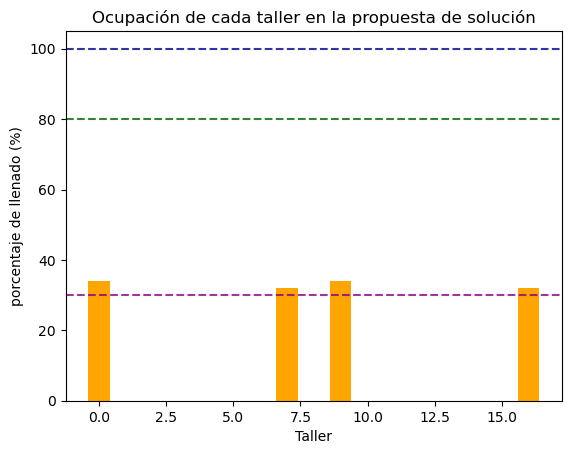

In [117]:
#contar cuanto se llenó cada taller
talleres = []
porcentajes = []
U_2 = U + U
capacidad_real_taller = defaultdict(int) #la key es el id del taller 0, 1,... y el value es la cantidad de alumnos asignados a este taller en la solución
for key, value in dic_asignaciones_realizadas.items():
    for taller in value:
       capacidad_real_taller[taller] += 1 

for taller, cantidad in sorted(capacidad_real_taller.items()):
    porcentaje = 100 * cantidad / U_2[taller]
    talleres.append(taller)
    porcentajes.append(porcentaje)
    print(f"El taller {taller} tiene {cantidad} alumnos, está un {100*(cantidad/U_2[taller])}% lleno")

plt.bar(talleres, porcentajes, color='orange')
plt.ylabel('porcentaje de llenado (%)')
plt.xlabel('Taller')
plt.title('Ocupación de cada taller en la propuesta de solución')
plt.axhline(100, color='darkblue', linestyle='--', linewidth=1.5, label='100%', alpha=0.8)
plt.axhline(80, color='darkgreen', linestyle='--', linewidth=1.5, label='80%', alpha=0.8)
plt.axhline(30, color='darkmagenta', linestyle='--', linewidth=1.5, label='30%', alpha=0.8)

## Extra things that might be useful

In [ ]:
#si es infactible, ver la razón
"""
if model.status == GRB.INFEASIBLE:
    print("Modelo es infeasible. Buscando IIS...")
    
    # Computar IIS
    model.computeIIS()
    
    # Mostrar restricciones y variables en conflicto
    print("\nRestricciones en conflicto:")
    for c in model.getConstrs():
        if c.IISConstr:
            print(c.ConstrName)
    
    print("\nVariables involucradas en conflicto:")
    for v in model.getVars():
        if v.IISLB or v.IISUB:
            print(v.VarName)
"""

In [84]:
#para revisar
for key, value in dic_asignaciones_realizadas.items():
    if len(value) != 2:
        print(f"Al estudiante {key} se le asignó taller(es) {value}, verificar si es taller de 1 día completo o fallo")

Al estudiante 1 se le asignó taller(es) [9], verificar si es taller de 1 día completo o fallo
Al estudiante 7 se le asignó taller(es) [9], verificar si es taller de 1 día completo o fallo
Al estudiante 11 se le asignó taller(es) [9], verificar si es taller de 1 día completo o fallo
Al estudiante 13 se le asignó taller(es) [9], verificar si es taller de 1 día completo o fallo
Al estudiante 41 se le asignó taller(es) [9], verificar si es taller de 1 día completo o fallo
Al estudiante 58 se le asignó taller(es) [9], verificar si es taller de 1 día completo o fallo
Al estudiante 60 se le asignó taller(es) [9], verificar si es taller de 1 día completo o fallo
Al estudiante 62 se le asignó taller(es) [9], verificar si es taller de 1 día completo o fallo
Al estudiante 73 se le asignó taller(es) [9], verificar si es taller de 1 día completo o fallo
Al estudiante 74 se le asignó taller(es) [9], verificar si es taller de 1 día completo o fallo
Al estudiante 96 se le asignó taller(es) [9], verifi

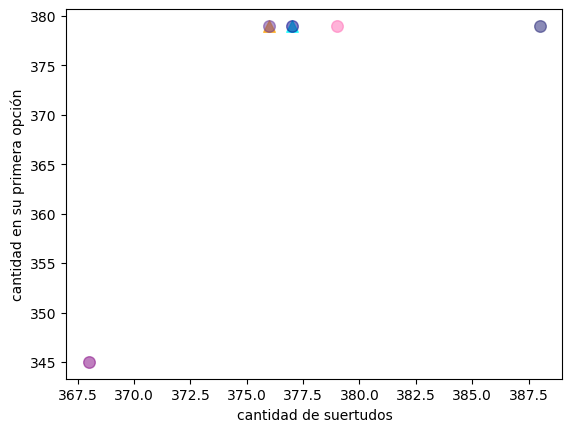

In [38]:
###comparar resultados pesos
pesos_1 = [388, 379, 257] #10, 5, 3
pesos_2 = [377, 379, 268] #3, 2, 1
pesos_3 = [376, 379, 269] #10.000, 100, 1
pesos_4 = [376, 379, 269] #100, 10, 1 
pesos_5 = [377, 379, 268] #10, 2, 1
pesos_6 = [368, 345, 320] #16, 15, 5
pesos_7 = [379, 379, 266] #8, 4, 2

fig, ax = plt.subplots()
ax.scatter(pesos_1[0], pesos_1[1], marker='o', c='midnightblue', alpha=0.5, s=70)
ax.scatter(pesos_2[0], pesos_2[1], marker='^', c='cyan', alpha=0.7, s=70)
ax.scatter(pesos_3[0], pesos_3[1], marker='^', c='orange', alpha=0.7, s=70)
ax.scatter(pesos_4[0], pesos_4[1], marker='o', c='rebeccapurple', alpha=0.5, s=70)
ax.scatter(pesos_5[0], pesos_5[1], marker='o', c='darkblue', alpha=0.5, s=70)
ax.scatter(pesos_6[0], pesos_6[1], marker='o', c='purple', alpha=0.5, s=70)
ax.scatter(pesos_7[0], pesos_7[1], marker='o', c='hotpink', alpha=0.5, s=70)

ax.set_xlabel('cantidad de suertudos')
ax.set_ylabel('cantidad en su primera opción')

plt.show()
#colores: https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py

In [86]:
#revisar que esté bien
suma_AM = 0
suma_PM = 0
for taller in talleres_AM:
    suma_AM += capacidad_real_taller[taller]
for taller in talleres_PM:
    suma_PM += capacidad_real_taller[taller]
print(suma_AM)
print(suma_PM)

392
392


### View some workshop assignments vs what you chose

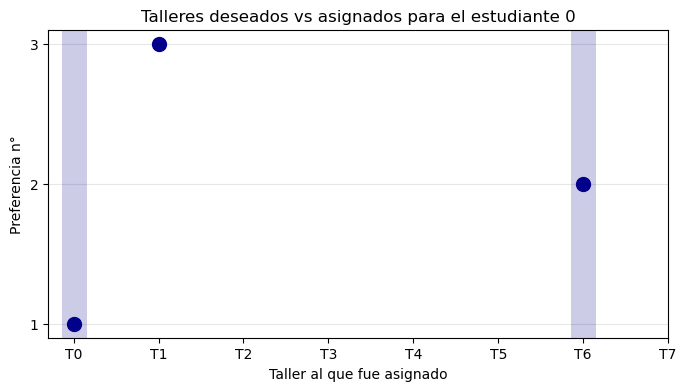

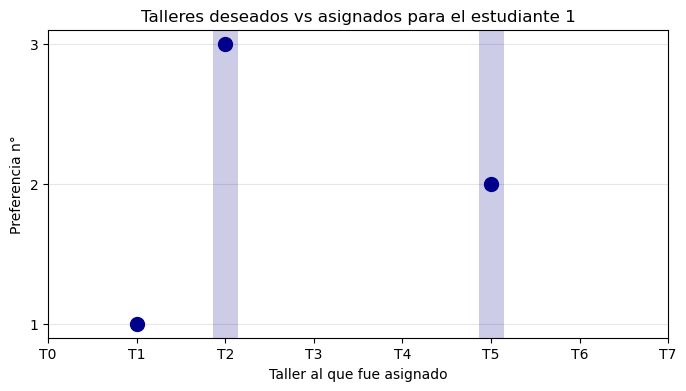

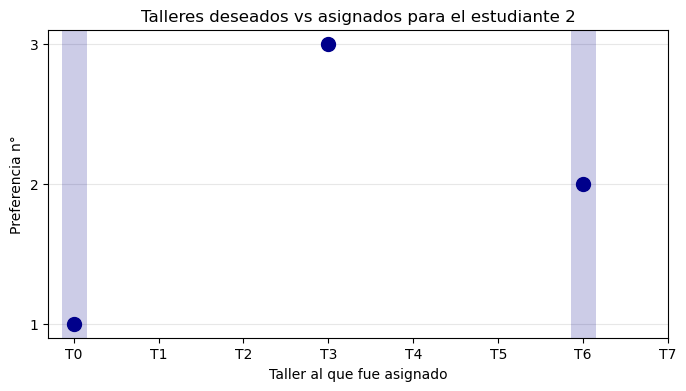

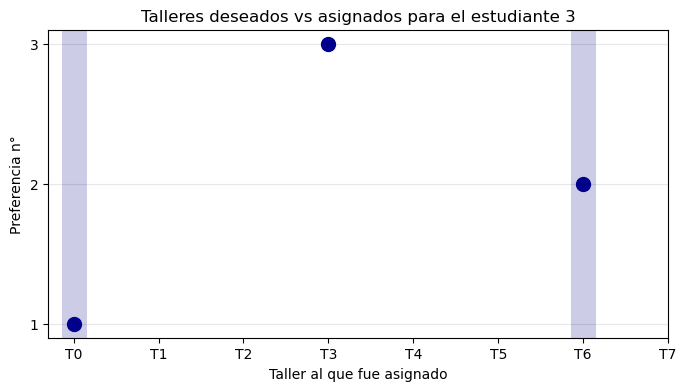

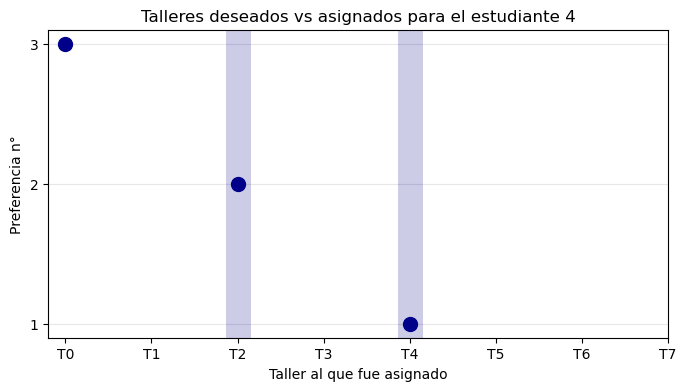

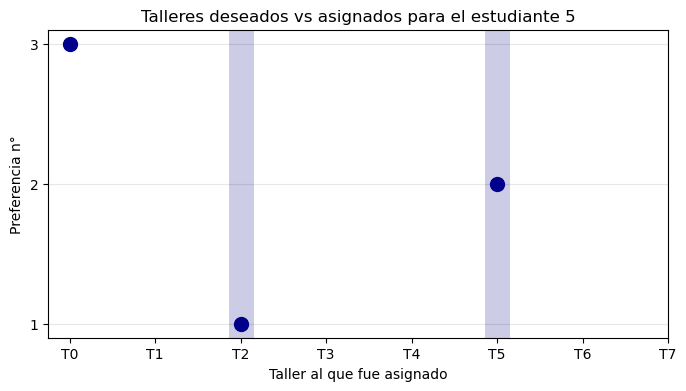

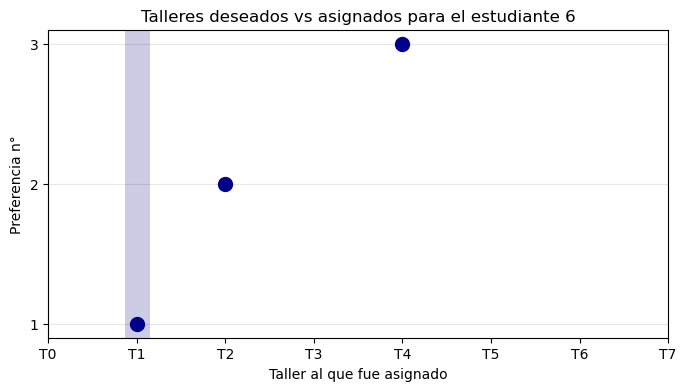

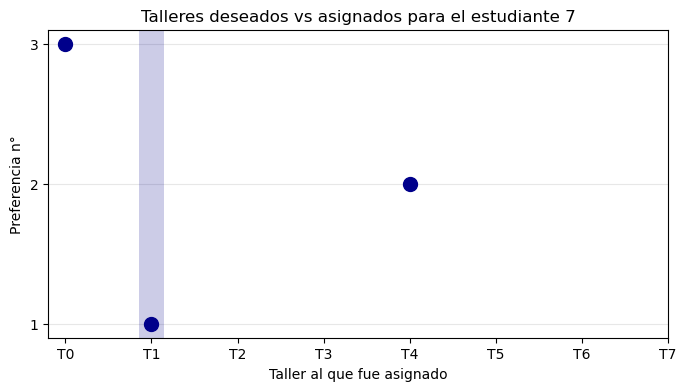

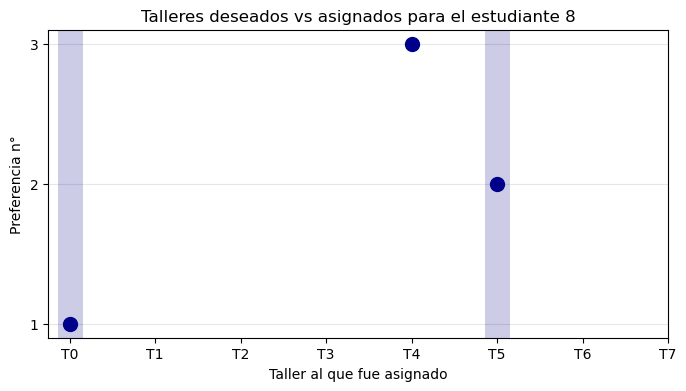

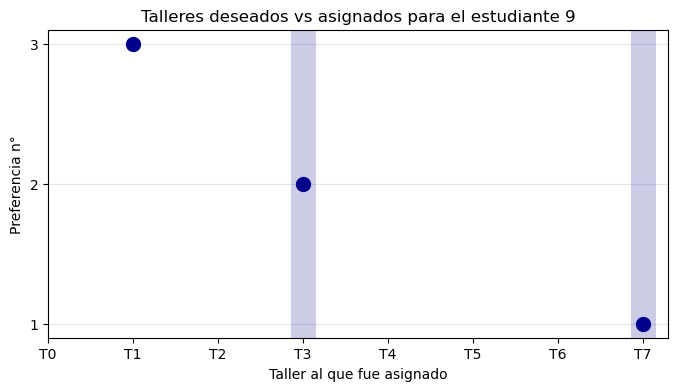

In [73]:
#visualizar la asignación de talleres
talleres = ['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']
#para los estudiantes 0 al 9 muestra los talleres que quería y a los que fue asignado
for i in range(10):
    n_estudiante = i
    preferencias = util.get_dict(pref_m_aal, n_estudiante) #preferencia, taller
    asignados = dic_asignaciones_realizadas_mod[i] #asignaciones que se les dio, en mod
    
    plt.figure(figsize=(8, 4))
    #sombrear las columnas de los talleres asignados
    for t in asignados:
        plt.axvline(x=t, color='darkblue', alpha=0.2, linewidth=18, label='Asignado' if t == asignados[0] else "")
    
    #marcar los puntos de las preferencias
    for pref, t in preferencias.items():
        plt.scatter(t, pref, color='darkblue', s=100, zorder=3, label='Quería' if pref == 1 else "")
    
    plt.xticks(range(len(talleres)), talleres)
    plt.yticks(range(1, 4))
    plt.ylabel('Preferencia n°')
    plt.xlabel('Taller al que fue asignado')
    plt.title(f'Talleres deseados vs asignados para el estudiante {i}')
    #plt.legend()
    plt.grid(True, axis='y', alpha=0.3)
    plt.show()

<br><br><br><br><br><br><br><br><br><br>

# Study by order of arrival

Here we would first need some way to select which workshops will be held:

1. Hold the workshops that obtain a majority.
2. Test combinations and choose the best one: there are 1,575 possible assignment options.

In [216]:
from collections import defaultdict
df = pd.read_csv("datos_arreglados.csv", encoding="latin1")
df = df[df["ID"] > 60] #esto pues las primeras filas estaban falladas

bach = df[df['program'] == 'bachelor'] #selecciona las tuplas de bachelor en un df
mast = df[df['program'] == 'master'] #selecciona las tuplas master en un df

b_aal = bach[bach['campus'] == 'AAL'] #selecciona las tuplas bachelor aal en df
m_aal = mast[mast['campus'] == 'AAL'] #selecciona las tuplas master aal en df

b_cph = bach[bach['campus'] == 'CPH'] #selecciona las tuplas bachelor cph en df
m_cph = mast[mast['campus'] == 'CPH'] #selecciona las tuplas master cph en df

esb = df[df['campus'] == 'ESB'] #selecciona las tuplas esb en df

col1 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most4' 
col2 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most5'
col3 = 'Select 3 workshops in a prioritised order, where 1 is the workshop you want to attend the most6'

cursos_b_aal = sorted(set(b_aal[col1]) | set(b_aal[col2]) | set(b_aal[col3])) #talleres disponibles para bachelor aal, en base a los seleccionados en top 3
cursos_m_aal = sorted(set(m_aal[col1]) | set(m_aal[col2]) | set(m_aal[col3])) #talleres disponibles para master aal,  en base a los seleccionados en top 3

cursos_b_cph = sorted(set(b_cph[col1]) | set(b_cph[col2]) | set(b_cph[col3])) #talleres disponibles para bachelor cph, en base a los seleccionados en top 3
cursos_m_cph = sorted(set(m_cph[col1]) | set(m_cph[col2]) | set(m_cph[col3])) #talleres disponibles para master cph,  en base a los seleccionados en top 3

cursos_esb = sorted(set(esb[col1]) | set(esb[col2]) | set(esb[col3])) #talleres disponibles para esb, en base a los seleccionados en top 3


#selecciona columnas de los nombres de curso, donde cada columna posee NaN, 1, 2, 3 indicando preferencia top 3 o no
pref_b_aal = b_aal[cursos_b_aal] 
pref_m_aal = m_aal[cursos_m_aal] 

pref_b_cph = b_cph[cursos_b_cph]
pref_m_cph = m_cph[cursos_m_cph]

pref_esb = esb[cursos_esb]

## Shuffle the rows to obtain a new ordering.

In [217]:
shuffled_df_1 = pref_esb.sample(frac=1, random_state=1)
shuffled_df_1 = shuffled_df_1.reset_index(drop=True)
shuffled_df_1.head()

,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,3.0
4,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [218]:
shuffled_df_2 = pref_esb.sample(frac=1, random_state=2)
shuffled_df_2 = shuffled_df_2.reset_index(drop=True)
shuffled_df_2.head()

,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,NaN,3.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [219]:
shuffled_df_3 = pref_esb.sample(frac=1, random_state=3)
shuffled_df_3 = shuffled_df_3.reset_index(drop=True)
shuffled_df_3.head()

,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,3.0
1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
2,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [220]:
shuffled_df_4 = pref_esb.sample(frac=1, random_state=4)
shuffled_df_4 = shuffled_df_4.reset_index(drop=True)
shuffled_df_4.head()

,Clarification of individual professional competences,Collaboration across discplines,Creativity and entrepeneurship,Digital and hybrid practices in collaborative work,Digital practices in project work,Ethical technology assessment,Facilitation of productive meeting,Generative AI in study practices?,Interdisciplinary problem design,Leadership and project management,"Motivation, well-being and work-life balance?",Professional communication with external partners,Professional identity development,Psychological safety in team work,Psychological safety in teamwork,SCRUM-techniques in project work?,Systems thinking in engineering
0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0
1,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,NaN,NaN
2,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
pref = shuffled_df_4
(S, T, H, C, U, t_pref, D, p) = util.get_par(pref)

print("Hay", len(pref), "estudiantes, considerar esto al elegir capacidad y número de talleres")
n_alumnos = len(pref)
talleres_AM_realizar = [7, 9] #[0, 1, 3, 4, 6, 5] #talleres que se dan
talleres_PM_realizar = [0, 16] #[0, 1, 2, 4, 6, 7] #talleres que se dan
dia_completo = []#[1] #[] #agregar el [1] para los casos de magister!!!!

Hay 33 estudiantes, considerar esto al elegir capacidad y número de talleres


In [250]:
def asignar(estudiante, cupos_restantes_AM, cupos_restantes_PM, t_pref, dict_asignacion_llegada, dia_completo):
    pref_1 = t_pref[estudiante][1] #taller top 1
    pref_2 = t_pref[estudiante][2] #taller top 2
    pref_3 = t_pref[estudiante][3] #taller top 3

    asignacion_AM = False #not asigned initially
    asignacion_PM = False #not asigned initially        

    if pref_1 in cupos_restantes_AM.keys() or pref_1 in cupos_restantes_PM.keys(): #if top 1 is still available in AM or PM or both
        if (pref_1 in dia_completo) & (cupos_restantes_AM[pref_1] > 0) & (cupos_restantes_PM[pref_1] > 0): #full day available
            dict_asignacion_llegada[estudiante].append(pref_1) #takes the workshop
            cupos_restantes_AM[pref_1] -= 1
            cupos_restantes_PM[pref_1] -= 1
            #print("Estudiante", estudiante, "con pref", t_pref[estudiante], "fue asignado a", pref_1)
            return cupos_restantes_AM, cupos_restantes_PM, dict_asignacion_llegada #this student has the day fully booked
        elif cupos_restantes_AM[pref_1] > 0:
            dict_asignacion_llegada[estudiante].append(pref_1)
            cupos_restantes_AM[pref_1] -= 1
            asignacion_AM = True
            #print("Estudiante", estudiante, "con pref", t_pref[estudiante], "fue asignado a", pref_1)
        elif cupos_restantes_PM[pref_1] > 0:
            dict_asignacion_llegada[estudiante].append(pref_1)
            cupos_restantes_PM[pref_1] -= 1
            asignacion_PM = True
            #print("Estudiante", estudiante, "con pref", t_pref[estudiante], "fue asignado a", pref_1)

    if pref_2 in cupos_restantes_AM.keys() or pref_2 in cupos_restantes_PM.keys(): 
        if (pref_2 in dia_completo) & (cupos_restantes_AM[pref_2] > 0) & (cupos_restantes_PM[pref_2] > 0) & (not asignacion_AM) & (not asignacion_PM):
            dict_asignacion_llegada[estudiante].append(pref_2)
            cupos_restantes_AM[pref_2] -= 1
            cupos_restantes_PM[pref_2] -= 1
            #print("Estudiante", estudiante, "con pref", t_pref[estudiante], "fue asignado a", pref_2)
            return cupos_restantes_AM, cupos_restantes_PM, dict_asignacion_llegada
        if (cupos_restantes_AM[pref_2] > 0) & (not asignacion_AM):
            dict_asignacion_llegada[estudiante].append(pref_2)
            cupos_restantes_AM[pref_2] -= 1
            asignacion_AM = True
            #print("Estudiante", estudiante, "con pref", t_pref[estudiante], "fue asignado a", pref_2)
        elif (cupos_restantes_PM[pref_2] > 0) & (not asignacion_PM):
            dict_asignacion_llegada[estudiante].append(pref_2)
            cupos_restantes_PM[pref_2] -= 1
            asignacion_PM = True
            #print("Estudiante", estudiante, "con pref", t_pref[estudiante], "fue asignado a", pref_2)

    if pref_3 in cupos_restantes_AM.keys() or pref_3 in cupos_restantes_PM.keys():
        if (pref_3 in dia_completo) & (cupos_restantes_AM[pref_3] > 0) & (cupos_restantes_PM[pref_3] > 0) & (not asignacion_AM) & (not asignacion_PM):
            dict_asignacion_llegada[estudiante].append(pref_3)
            cupos_restantes_AM[pref_3] -= 1
            cupos_restantes_PM[pref_3] -= 1
            #print("Estudiante", estudiante, "con pref", t_pref[estudiante], "fue asignado a", pref_3)
            return cupos_restantes_AM, cupos_restantes_PM, dict_asignacion_llegada
        elif (cupos_restantes_AM[pref_3] > 0) & (not asignacion_AM):
            dict_asignacion_llegada[estudiante].append(pref_3)
            cupos_restantes_AM[pref_3] -= 1
            asignacion_AM = True
            #print("Estudiante", estudiante, "con pref", t_pref[estudiante], "fue asignado a", pref_3)
        elif (cupos_restantes_PM[pref_3] > 0) & (not asignacion_PM):
            dict_asignacion_llegada[estudiante].append(pref_3)
            cupos_restantes_PM[pref_3] -= 1
            asignacion_PM = True
            #print("Estudiante", estudiante, "con pref", t_pref[estudiante], "fue asignado a", pref_3)
    return cupos_restantes_AM, cupos_restantes_PM, dict_asignacion_llegada

In [251]:
dict_asignacion_llegada = dict()
for i in range(len(pref)):
    dict_asignacion_llegada[i] = []

capacidad_sala = 50 #modificar
cupos_restantes_AM = defaultdict(int)
cupos_restantes_PM = defaultdict(int)

for i in talleres_AM_realizar:
    cupos_restantes_AM[i] = capacidad_sala

for i in talleres_PM_realizar:
    cupos_restantes_PM[i] = capacidad_sala
    
for estudiante in range(len(pref)):
    cupos_restantes_AM, cupos_restantes_PM, dict_asignacion_llegada = asignar(estudiante, cupos_restantes_AM, cupos_restantes_PM, t_pref, dict_asignacion_llegada, dia_completo)

In [252]:
S = range(len(pref))
contador_suertudo = 0
contador_no = 0
contador = 0

for s in range(len(S)):
    asignados = dict_asignacion_llegada[s]  
    prefs_vals = set(t_pref[s].values())     
    if asignados == []:
        contador_no += 1
    elif (len(asignados) == 1) and (asignados != dia_completo):
        contador_no += 1 
    #todos los asignados están entre los valores preferidos
    elif all(a in prefs_vals for a in asignados):
        contador_suertudo += 1
    else:
        contador_no += 1
    contador += 1
print("Total suertudos:", contador_suertudo, contador_suertudo/contador*100)
print(f"Hay {contador_no} estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el {contador_no/n_alumnos} de 1")

Total suertudos: 9 27.27272727272727
Hay 24 estudiantes que quedaron en algo que no pidieron (al menos 1 taller), esto es el 0.7272727272727273 de 1


In [253]:
contador_primera = 0
contador_segunda = 0
fir = []
sec = []
for s in range(len(S)):
    if (t_pref[s][1] in dict_asignacion_llegada[s]):
        contador_primera += 1 #quedó en top 1
        fir.append(s)
    if (t_pref[s][2] in dict_asignacion_llegada[s]):
        contador_segunda += 1 #quedó en top2
        sec.append(s)
print("En 1era opcion", contador_primera/n_alumnos*100)
print("En 2nda opcion", contador_segunda/n_alumnos*100)

En 1era opcion 36.36363636363637
En 2nda opcion 48.484848484848484


In [254]:
p = [10, 5, 3]
def obj_ind(estudiante):
    suma = 0
    pref_1 = t_pref[estudiante][1]
    pref_2 = t_pref[estudiante][2]
    pref_3 = t_pref[estudiante][3]

    if pref_1 in dict_asignacion_llegada[estudiante]:
        suma += p[0]
    if pref_2 in dict_asignacion_llegada[estudiante]:
        suma += p[1]
    if pref_3 in dict_asignacion_llegada[estudiante]:
        suma += p[2]
    return suma

In [255]:
valor_objetivo = 0

for estudiante in S:
    valor_objetivo += obj_ind(estudiante)

In [256]:
valor_objetivo / (len(S) - 1)

7.375

<br><br><br><br><br><br><br><br><br><br>

# Analizar el bienestar de la solución de este año

In [2]:
df_2 = pd.read_csv("asignaciones2025.csv", encoding="utf8")
df_2 = df_2[df_2["ID"] > 60] #esto pues las primeras filas estaban falladas
nombres_columnas = list(df_2.columns[3:31])
nombres_columnas = ['ID', 'campus', 'program'] + nombres_columnas + ['separator'] + nombres_columnas
df_2.columns = nombres_columnas 

In [3]:
#diccionario nombre taller número
nombres_columnas = list(df_2.columns[3:31])
dic_nombre_num ={}
c = 1
for columna in nombres_columnas:
    dic_nombre_num[columna] = c
    c += 1

In [4]:
bach = df_2[df_2['program'] == 'bachelor'] #selecciona las tuplas de bachelor en un df
mast = df_2[df_2['program'] == 'master'] #selecciona las tuplas master en un df

b_aal = bach[bach['campus'] == 'AAL'] #selecciona las tuplas bachelor aal en df
m_aal = mast[mast['campus'] == 'AAL'] #selecciona las tuplas master aal en df

b_cph = bach[bach['campus'] == 'CPH'] #selecciona las tuplas bachelor cph en df
m_cph = mast[mast['campus'] == 'CPH'] #selecciona las tuplas master cph en df

esb = df_2[df_2['campus'] == 'ESB'] #selecciona las tuplas esb en df

## AAL bachelor

In [5]:
#reviso el taller que quería cada estudiante
dic_id_talleres = {}
for index, row in b_aal.iterrows():
    ID = row[0]
    info = row[3:31]
    talleres = {}
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            talleres[int(info[i])] = i+1 #puest talleres van de 1 en adelante
    dic_id_talleres[ID] = talleres

C:\Users\monts\AppData\Local\Temp\ipykernel_9184\2256028795.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ID = row[0]
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\2256028795.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.isnan(info[i]):
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\2256028795.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  talleres[int(info[i])] = i+1 #puest talleres van de 1 en adela

In [6]:
#reviso a que taller fue asignado el estudiante
dic_id_asignacion = {}
for index, row in b_aal.iterrows():
    ID = row[0]
    info = row[32:]
    talleres = []
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            talleres.append(i+1) #pues talleres van de 1 en adelante
    if len(talleres) == 2:
        dic_id_asignacion[ID] = talleres
    elif len(talleres) == 3:
        talleres.pop()
        dic_id_asignacion[ID] = talleres
    elif len(talleres) == 1:
        talleres.append(-1) #le agrego un taller imaginario que no quería
        dic_id_asignacion[ID] = talleres

C:\Users\monts\AppData\Local\Temp\ipykernel_9184\1091180575.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ID = row[0]
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\1091180575.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.isnan(info[i]):


In [7]:
#recorramos las preferencias que querían y veamos las que obtuvieron
algo = 0
suertudos = 0
primera_op = 0
segunda_op = 0
tercera_op = 0
suma = 0
n = 0
for key, value in dic_id_talleres.items():
    try:
        obtuvo = dic_id_asignacion[key]
        queria = value
        alguno = False        
        if queria[1] in obtuvo:
            alguno = True
            primera_op += 1
            suma += 10
        if queria[2] in obtuvo:
            alguno = True
            segunda_op += 1
            suma += 5
        if queria[3] in obtuvo:
            alguno = True
            tercera_op += 1
            suma += 3
        if alguno:
            algo += 1
        if all(item in list(queria.values()) for item in obtuvo):
            suertudos += 1
        n += 1
    except KeyError:
        pass
        #print("Al parecer no fui asignado")
print(n)
print(algo)
print(primera_op)
print(segunda_op)
print(tercera_op)
print(suertudos)
print(suma/n)

210
207
164
139
73
169
12.161904761904761


## AAL magister

In [8]:
#reviso el taller que quería cada estudiante
dic_id_talleres = {}
for index, row in m_aal.iterrows():
    ID = row[0]
    info = row[3:31]
    talleres = {}
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            talleres[int(info[i])] = i+1 #pues talleres van de 1 en adelante
    dic_id_talleres[ID] = talleres

C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3503192993.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ID = row[0]
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3503192993.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.isnan(info[i]):
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3503192993.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  talleres[int(info[i])] = i+1 #pues talleres van de 1 en adelan

In [9]:
#reviso a que taller fue asignado el estudiante
dic_id_asignacion = {}
for index, row in m_aal.iterrows():
    ID = row[0]
    info = row[32:]
    talleres = []
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            talleres.append(i+1) #pues talleres van de 1 en adelante
    if len(talleres) == 2:
        dic_id_asignacion[ID] = talleres
    elif len(talleres) == 3:
        talleres.pop()
        dic_id_asignacion[ID] = talleres
    elif len(talleres) == 1:
        if talleres[0] == 11: #taller de día completo, está permitido
            dic_id_asignacion[ID] = talleres
        else:
            talleres.append(-1)
            dic_id_asignacion[ID] = talleres

C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3211520915.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ID = row[0]
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3211520915.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.isnan(info[i]):


In [10]:
#recorramos las preferencias que querían y veamos las que obtuvieron
algo = 0
suertudos = 0
primera_op = 0
segunda_op = 0
tercera_op = 0
suma = 0
n = 0
for key, value in dic_id_talleres.items():
    try:
        obtuvo = dic_id_asignacion[key]
        queria = value
        alguno = False        
        if queria[1] in obtuvo:
            alguno = True
            primera_op += 1
            suma += 10
        if queria[2] in obtuvo:
            alguno = True
            segunda_op += 1
            suma += 5
        if queria[3] in obtuvo:
            alguno = True
            tercera_op += 1
            suma += 3
        if alguno:
            algo += 1
        if all(item in list(queria.values()) for item in obtuvo):
            suertudos += 1
        n += 1
    except KeyError:
        pass
        #print("Al parecer no fui asignado")
print(n)
print(algo)
print(primera_op)
print(segunda_op)
print(tercera_op)
print(suertudos)
print(suma/n)

285
284
261
196
42
223
13.03859649122807


## CPH bachelor

In [11]:
#reviso el taller que quería cada estudiante
dic_id_talleres = {}
for index, row in b_cph.iterrows():
    ID = row[0]
    info = row[3:31]
    talleres = {}
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            talleres[int(info[i])] = i+1 #pues talleres van de 1 en adelante
    dic_id_talleres[ID] = talleres

C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3979687159.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ID = row[0]
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3979687159.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.isnan(info[i]):
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3979687159.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  talleres[int(info[i])] = i+1 #pues talleres van de 1 en adelan

In [12]:
#reviso a que taller fue asignado el estudiante
dic_id_asignacion = {}
for index, row in b_cph.iterrows():
    ID = row[0]
    info = row[32:]
    talleres = []
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            talleres.append(i+1) #puest talleres van de 1 en adelante
    if len(talleres) == 2:
        dic_id_asignacion[ID] = talleres
    elif len(talleres) == 3:
        talleres.pop()
        dic_id_asignacion[ID] = talleres
    elif len(talleres) == 1:
        talleres.append(-1) #le agrego un taller imaginario que no quería
        dic_id_asignacion[ID] = talleres

C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3104004992.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ID = row[0]
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3104004992.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.isnan(info[i]):


In [13]:
#recorramos las preferencias que querían y veamos las que obtuvieron
algo = 0
suertudos = 0
primera_op = 0
segunda_op = 0
tercera_op = 0
suma = 0
n = 0
for key, value in dic_id_talleres.items():
    try:
        obtuvo = dic_id_asignacion[key]
        queria = value
        alguno = False        
        if queria[1] in obtuvo:
            alguno = True
            primera_op += 1
            suma += 10
        if queria[2] in obtuvo:
            alguno = True
            segunda_op += 1
            suma += 5
        if queria[3] in obtuvo:
            alguno = True
            tercera_op += 1
            suma += 3
        if alguno:
            algo += 1
        if all(item in list(queria.values()) for item in obtuvo):
            suertudos += 1
        n += 1
    except KeyError:
        pass
        #print("Al parecer no fui asignado")
print(n)
print(algo)
print(primera_op)
print(segunda_op)
print(tercera_op)
print(suertudos)
print(suma/n)

54
54
37
33
18
34
10.907407407407407


## CPH magister

In [14]:
#reviso el taller que quería cada estudiante
dic_id_talleres = {}
for index, row in m_cph.iterrows():
    ID = row[0]
    info = row[3:31]
    talleres = {}
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            talleres[int(info[i])] = i+1 #pues talleres van de 1 en adelante
    dic_id_talleres[ID] = talleres

C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3315201860.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ID = row[0]
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3315201860.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.isnan(info[i]):
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3315201860.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  talleres[int(info[i])] = i+1 #pues talleres van de 1 en adelan

In [15]:
#reviso a que taller fue asignado el estudiante
dic_id_asignacion = {}
for index, row in m_cph.iterrows():
    ID = row[0]
    info = row[32:]
    talleres = []
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            talleres.append(i+1) #pues talleres van de 1 en adelante
    if len(talleres) == 2:
        dic_id_asignacion[ID] = talleres
    elif len(talleres) == 3:
        talleres.pop()
        dic_id_asignacion[ID] = talleres
    elif len(talleres) == 1:
        if talleres[0] == 11: #taller de día completo, está permitido
            dic_id_asignacion[ID] = talleres
        else:
            talleres.append(-1)
            dic_id_asignacion[ID] = talleres

C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3444712371.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ID = row[0]
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\3444712371.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.isnan(info[i]):


In [16]:
#recorramos las preferencias que querían y veamos las que obtuvieron
algo = 0
suertudos = 0
primera_op = 0
segunda_op = 0
tercera_op = 0
suma = 0
n = 0
for key, value in dic_id_talleres.items():
    try:
        obtuvo = dic_id_asignacion[key]
        queria = value
        alguno = False        
        if queria[1] in obtuvo:
            alguno = True
            primera_op += 1
            suma += 10
        if queria[2] in obtuvo:
            alguno = True
            segunda_op += 1
            suma += 5
        if queria[3] in obtuvo:
            alguno = True
            tercera_op += 1
            suma += 3
        if alguno:
            algo += 1
        if all(item in list(queria.values()) for item in obtuvo):
            suertudos += 1
        n += 1
    except KeyError:
        pass
        #print("Al parecer no fui asignado")
print(n)
print(algo)
print(primera_op)
print(segunda_op)
print(tercera_op)
print(suertudos)
print(suma/n)

40
40
38
21
9
29
12.8


## ESB

In [17]:
#reviso el taller que quería cada estudiante
dic_id_talleres = {}
for index, row in esb.iterrows():
    ID = row[0]
    info = row[3:31]
    talleres = {}
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            talleres[int(info[i])] = i+1 #pues talleres van de 1 en adelante
    dic_id_talleres[ID] = talleres

C:\Users\monts\AppData\Local\Temp\ipykernel_9184\2341826785.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ID = row[0]
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\2341826785.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.isnan(info[i]):
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\2341826785.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  talleres[int(info[i])] = i+1 #pues talleres van de 1 en adelan

In [18]:
#reviso a que taller fue asignado el estudiante
dic_id_asignacion = {}
for index, row in esb.iterrows():
    ID = row[0]
    info = row[32:]
    talleres = []
    for i in range(len(info)):
        if not np.isnan(info[i]): 
            talleres.append(i+1) #pues talleres van de 1 en adelante
    if len(talleres) == 2:
        dic_id_asignacion[ID] = talleres
    elif len(talleres) == 3:
        talleres.pop()
        dic_id_asignacion[ID] = talleres
    elif len(talleres) == 1:
        if talleres[0] == 11: #taller de día completo, está permitido
            dic_id_asignacion[ID] = talleres
        else:
            talleres.append(-1)
            dic_id_asignacion[ID] = talleres

C:\Users\monts\AppData\Local\Temp\ipykernel_9184\2216075490.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ID = row[0]
C:\Users\monts\AppData\Local\Temp\ipykernel_9184\2216075490.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if not np.isnan(info[i]):


In [19]:
#recorramos las preferencias que querían y veamos las que obtuvieron
algo = 0
suertudos = 0
primera_op = 0
segunda_op = 0
tercera_op = 0
suma = 0
n = 0
for key, value in dic_id_talleres.items():
    try:
        obtuvo = dic_id_asignacion[key]
        queria = value
        alguno = False        
        if queria[1] in obtuvo:
            alguno = True
            primera_op += 1
            suma += 10
        if queria[2] in obtuvo:
            alguno = True
            segunda_op += 1
            suma += 5
        if queria[3] in obtuvo:
            alguno = True
            tercera_op += 1
            suma += 3
        if alguno:
            algo += 1
        if all(item in list(queria.values()) for item in obtuvo):
            suertudos += 1
        n += 1
    except KeyError:
        pass
        #print("Al parecer no fui asignado")
print(n)
print(algo)
print(primera_op)
print(segunda_op)
print(tercera_op)
print(suertudos)
print(suma/n)

31
29
12
15
11
9
7.354838709677419
